In [773]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


# Load the csv file as a pandas DataFrame

In [964]:
csv_loc = r"C:\Users\Madhu\Desktop\7072CEM - Machine Learning\Bank_Marketing\bank\bank-full.csv"
csv_loc2 = r"C:\Users\Madhu\Desktop\7072CEM - Machine Learning\Bank_Marketing\bank-additional\bank-additional\bank-additional-full.csv"

In [965]:
# df = pd.read_csv(csv_loc, sep=';')
# term_deposits = df.copy()

df2 = pd.read_csv(csv_loc2, sep=';')
term_deposits2 = df2.copy()

In [989]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [967]:
# pd.set_option('display.max_columns', None)

## bank client data:
1 - age: (numeric)

2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education: (categorical: primary, secondary, tertiary and unknown)

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - balance: Balance of the individual.

## Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

| Columns | Description | Type | Notes |
| :- | :- | :- | :- |
| age | numeric | Bank Client Data | |
| job | type of job | Bank Client Data | |
| marital  | marital status | Bank Client Data | |
| education | categorical | Bank Client Data | |
| default | has credit in default? | Bank Client Data | |
| housing | has housing loan? | Bank Client Data | |
| loan | has personal loan? | Bank Client Data | |
| contact | contact communication type | Last Contact of The Current Campaign | |
| month | last contact month of year | Last Contact of The Current Campaign | |
| day_of_week | last contact day of the week | Last Contact of The Current Campaign | |
| duration | last contact duration, in seconds | Last Contact of The Current Campaign | This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |
| campaign | number of contacts performed during this campaign and for this client | Other | Includes last contact |
| pdays | number of days that passed by after the client was last contacted from a previous campaign | Other | 999 means client was not previously contacted |
| previous | number of contacts performed before this campaign and for this client | Other | |
| poutcome | outcome of the previous marketing campaign | Other | |
| emp.var.rate | employment variation rate - quarterly indicator | Social and Economic Context | |
| cons.price.idx | consumer price index - monthly indicator | Social and Economic Context | |
| cons.conf.idx | consumer confidence index - monthly indicator | Social and Economic Context | |
| euribor3m | euribor 3 month rate - daily indicator | Social and Economic Context | |
| nr.employed | number of employees - quarterly indicator | Social and Economic Context | |
| y | has the client subscribed a term deposit?| Target Variable |

In [968]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [969]:
df2.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [970]:
# bank_pd = pd.read_csv(r"C:\Users\Madhu\Desktop\7072CEM - Machine Learning\bank.csv")

## The classification goal is to predict if the client will subscribe a term deposit or not (variable y).

# Exploratory Data Analysis

In [971]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [972]:
df2.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [973]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [974]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [975]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [976]:
df2.columns = df2.columns.str.replace('.', '_', regex = False)

In [977]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [978]:
df2.shape

(41188, 21)

In [979]:
numerical_col = list(df2.select_dtypes(np.number).columns)

In [980]:
df2[numerical_col].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [981]:
categorical_col = list(df2.select_dtypes(object).columns)

In [982]:
df2[categorical_col].describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [983]:
df2.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
y                 False
dtype: bool

In [984]:
df2.duplicated().any()

True

In [986]:
df2[df2.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [796]:
df2[df2.duplicated(keep='first')].shape

(12, 21)

In [797]:
print("df2 shape before dropping duplicates",df2.shape)

df2 shape before dropping duplicates (41188, 21)


In [798]:
df2.drop_duplicates(inplace=True)

In [799]:
df2.reset_index(drop=True, inplace=True)

In [800]:
print("df2 shape after dropping duplicates",df2.shape)

df2 shape after dropping duplicates (41176, 21)


# Actual EDA starts from here

## Numerical Features

In [801]:
print('No. of numerical columns:',len(numerical_col),'\nNo. of categorical columns:',len(categorical_col))

No. of numerical columns: 10 
No. of categorical columns: 11


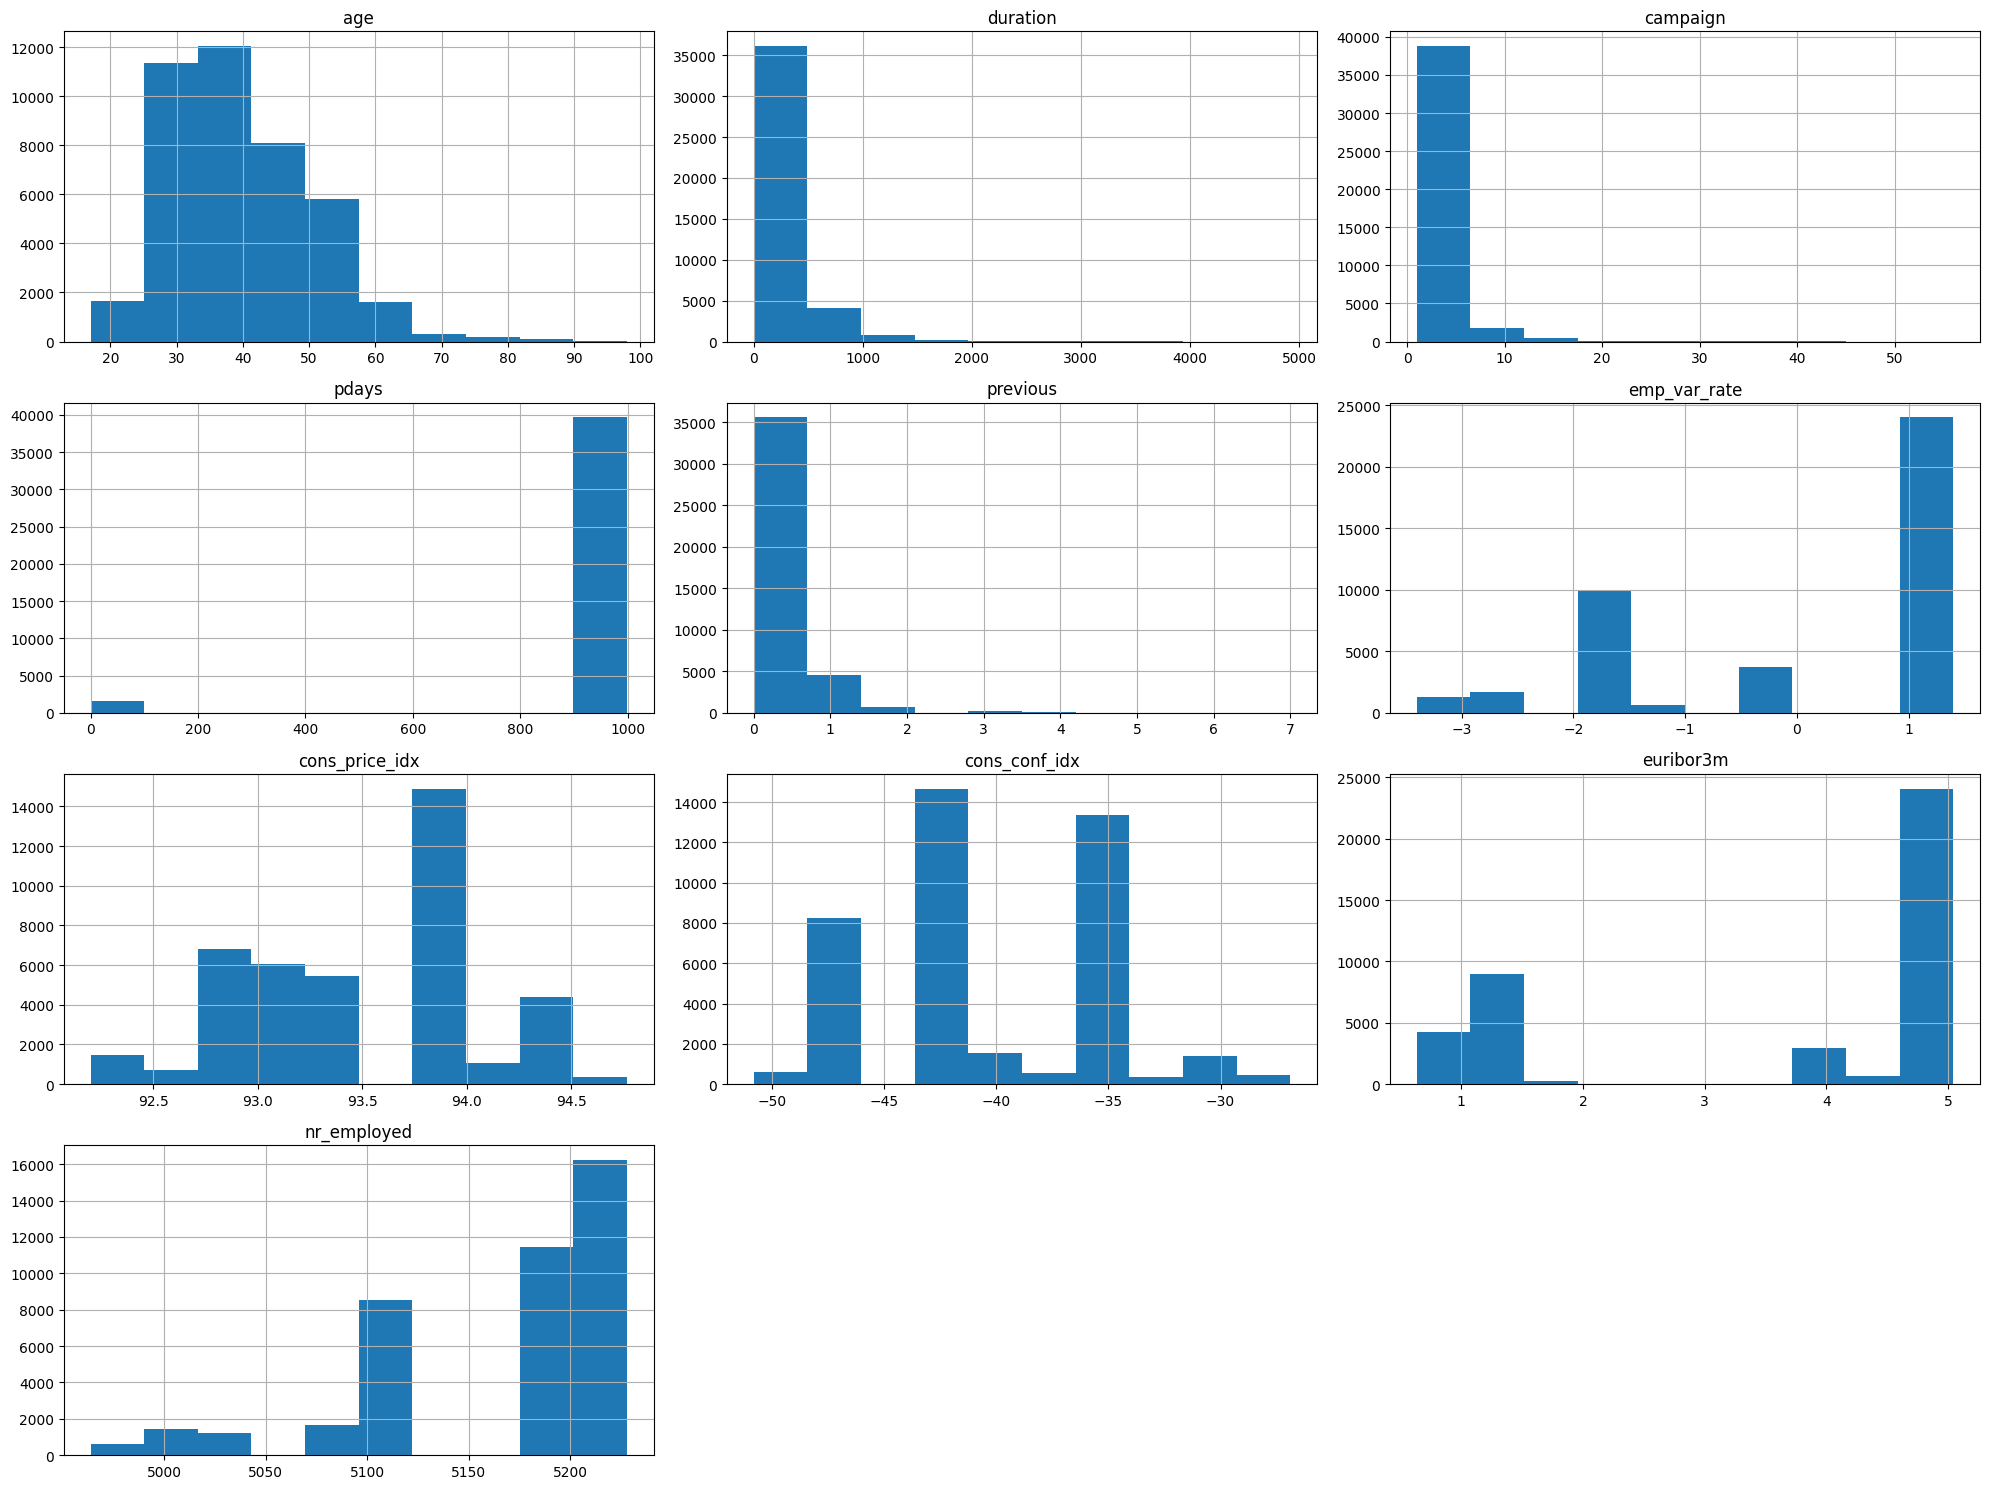

In [992]:
%matplotlib inline
df2.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

# Univariate

If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [803]:
numerical_col_skewness = df2[numerical_col].skew()
numerical_col_skewness

age               0.784560
duration          3.262808
campaign          4.762044
pdays            -4.921386
previous          3.831396
emp_var_rate     -0.724061
cons_price_idx   -0.230853
cons_conf_idx     0.302876
euribor3m        -0.709194
nr_employed      -1.044317
dtype: float64

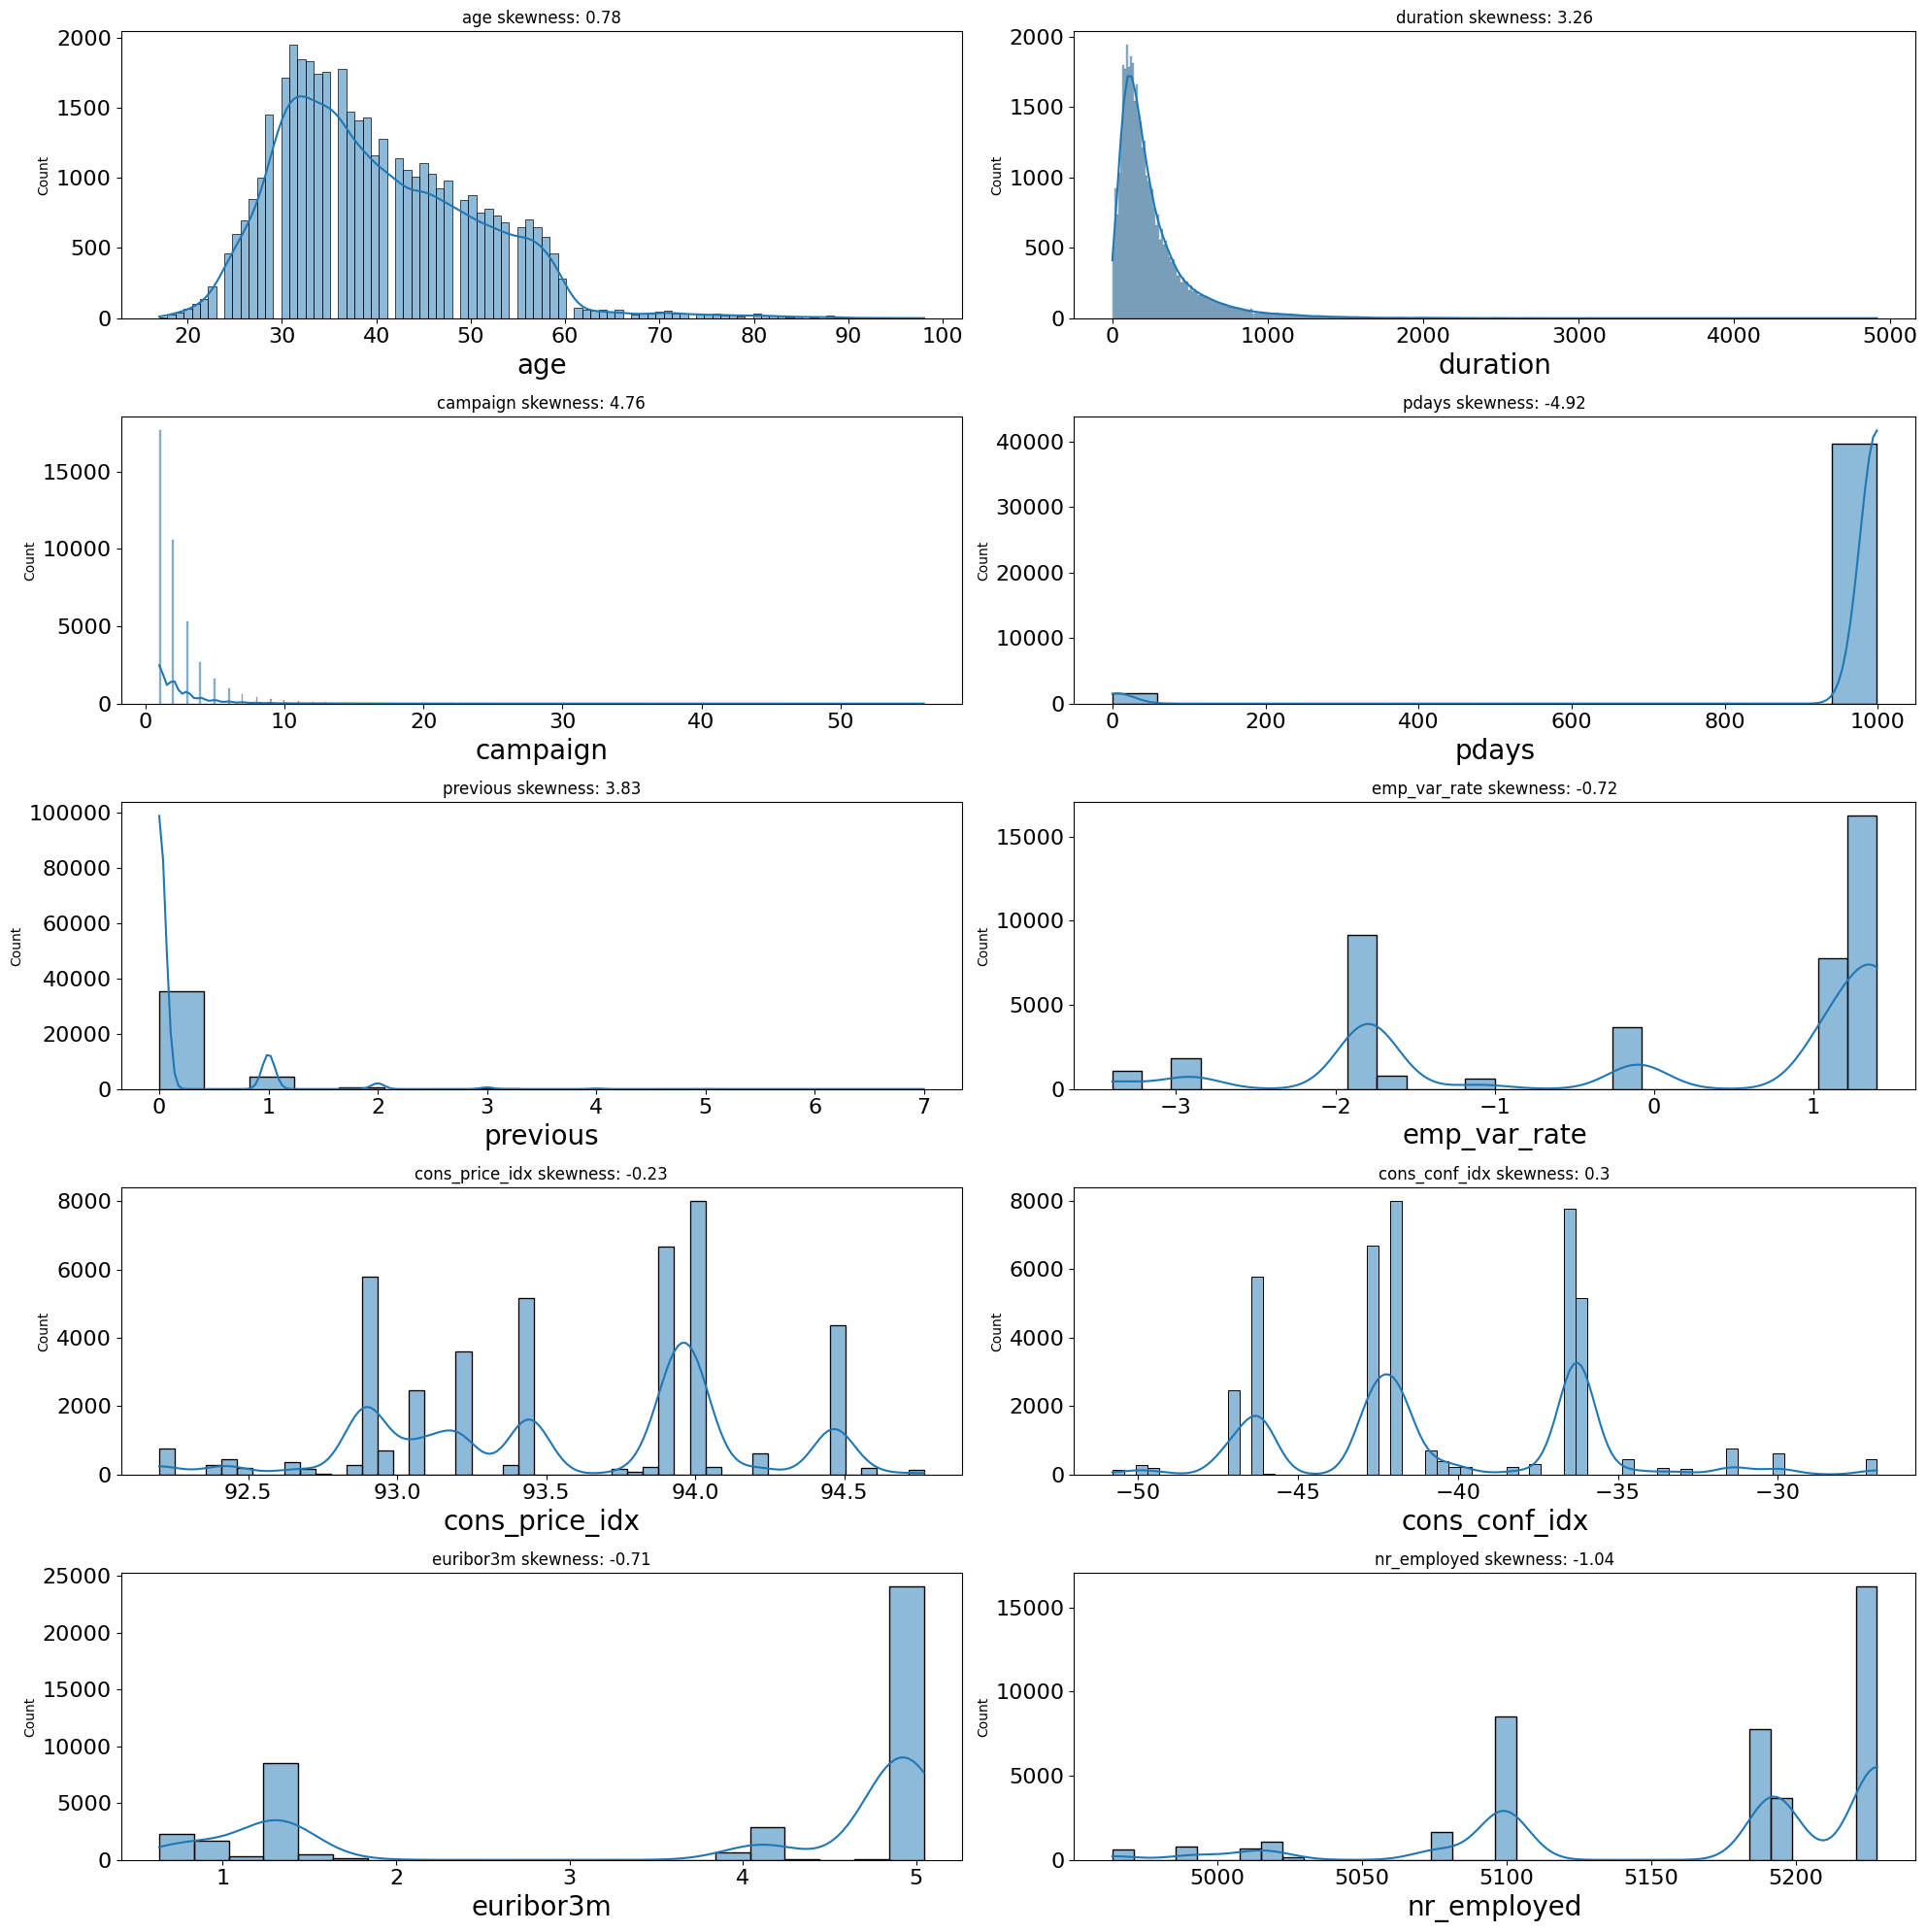

In [995]:
fig = plt.figure(figsize=(20, 20))
for i in range(len(numerical_col)):
    plt.subplot(len(numerical_col)//2, 2, i+1)
    ax = sns.histplot(df2[numerical_col[i]], kde = True)
    ax.set_xlabel(str(numerical_col[i]), fontsize = 20)
    ax.tick_params(labelsize=16)
    ax.set_title(str(numerical_col[i] + ' skewness: '+ str(round(numerical_col_skewness[i], 2))))
plt.tight_layout()
plt.show()

### Skewness:

cons_price_idx (left skewed) and cons_conf_idx are approximately symmetric.

age, euribor3m, emp_var_rate (left skewed), and nr_employed (left skewed) are moderately skewed.

duration, campaign, previous, and pdays (left skewed) are highly skewed.

### Multimodal: 
Some of the numerical variables have mode more than 1. 
They are called multimodal. The following features are multimodal:

emp_var_rate, cons_price_idx, cons_conf_idx, and nr_employed.

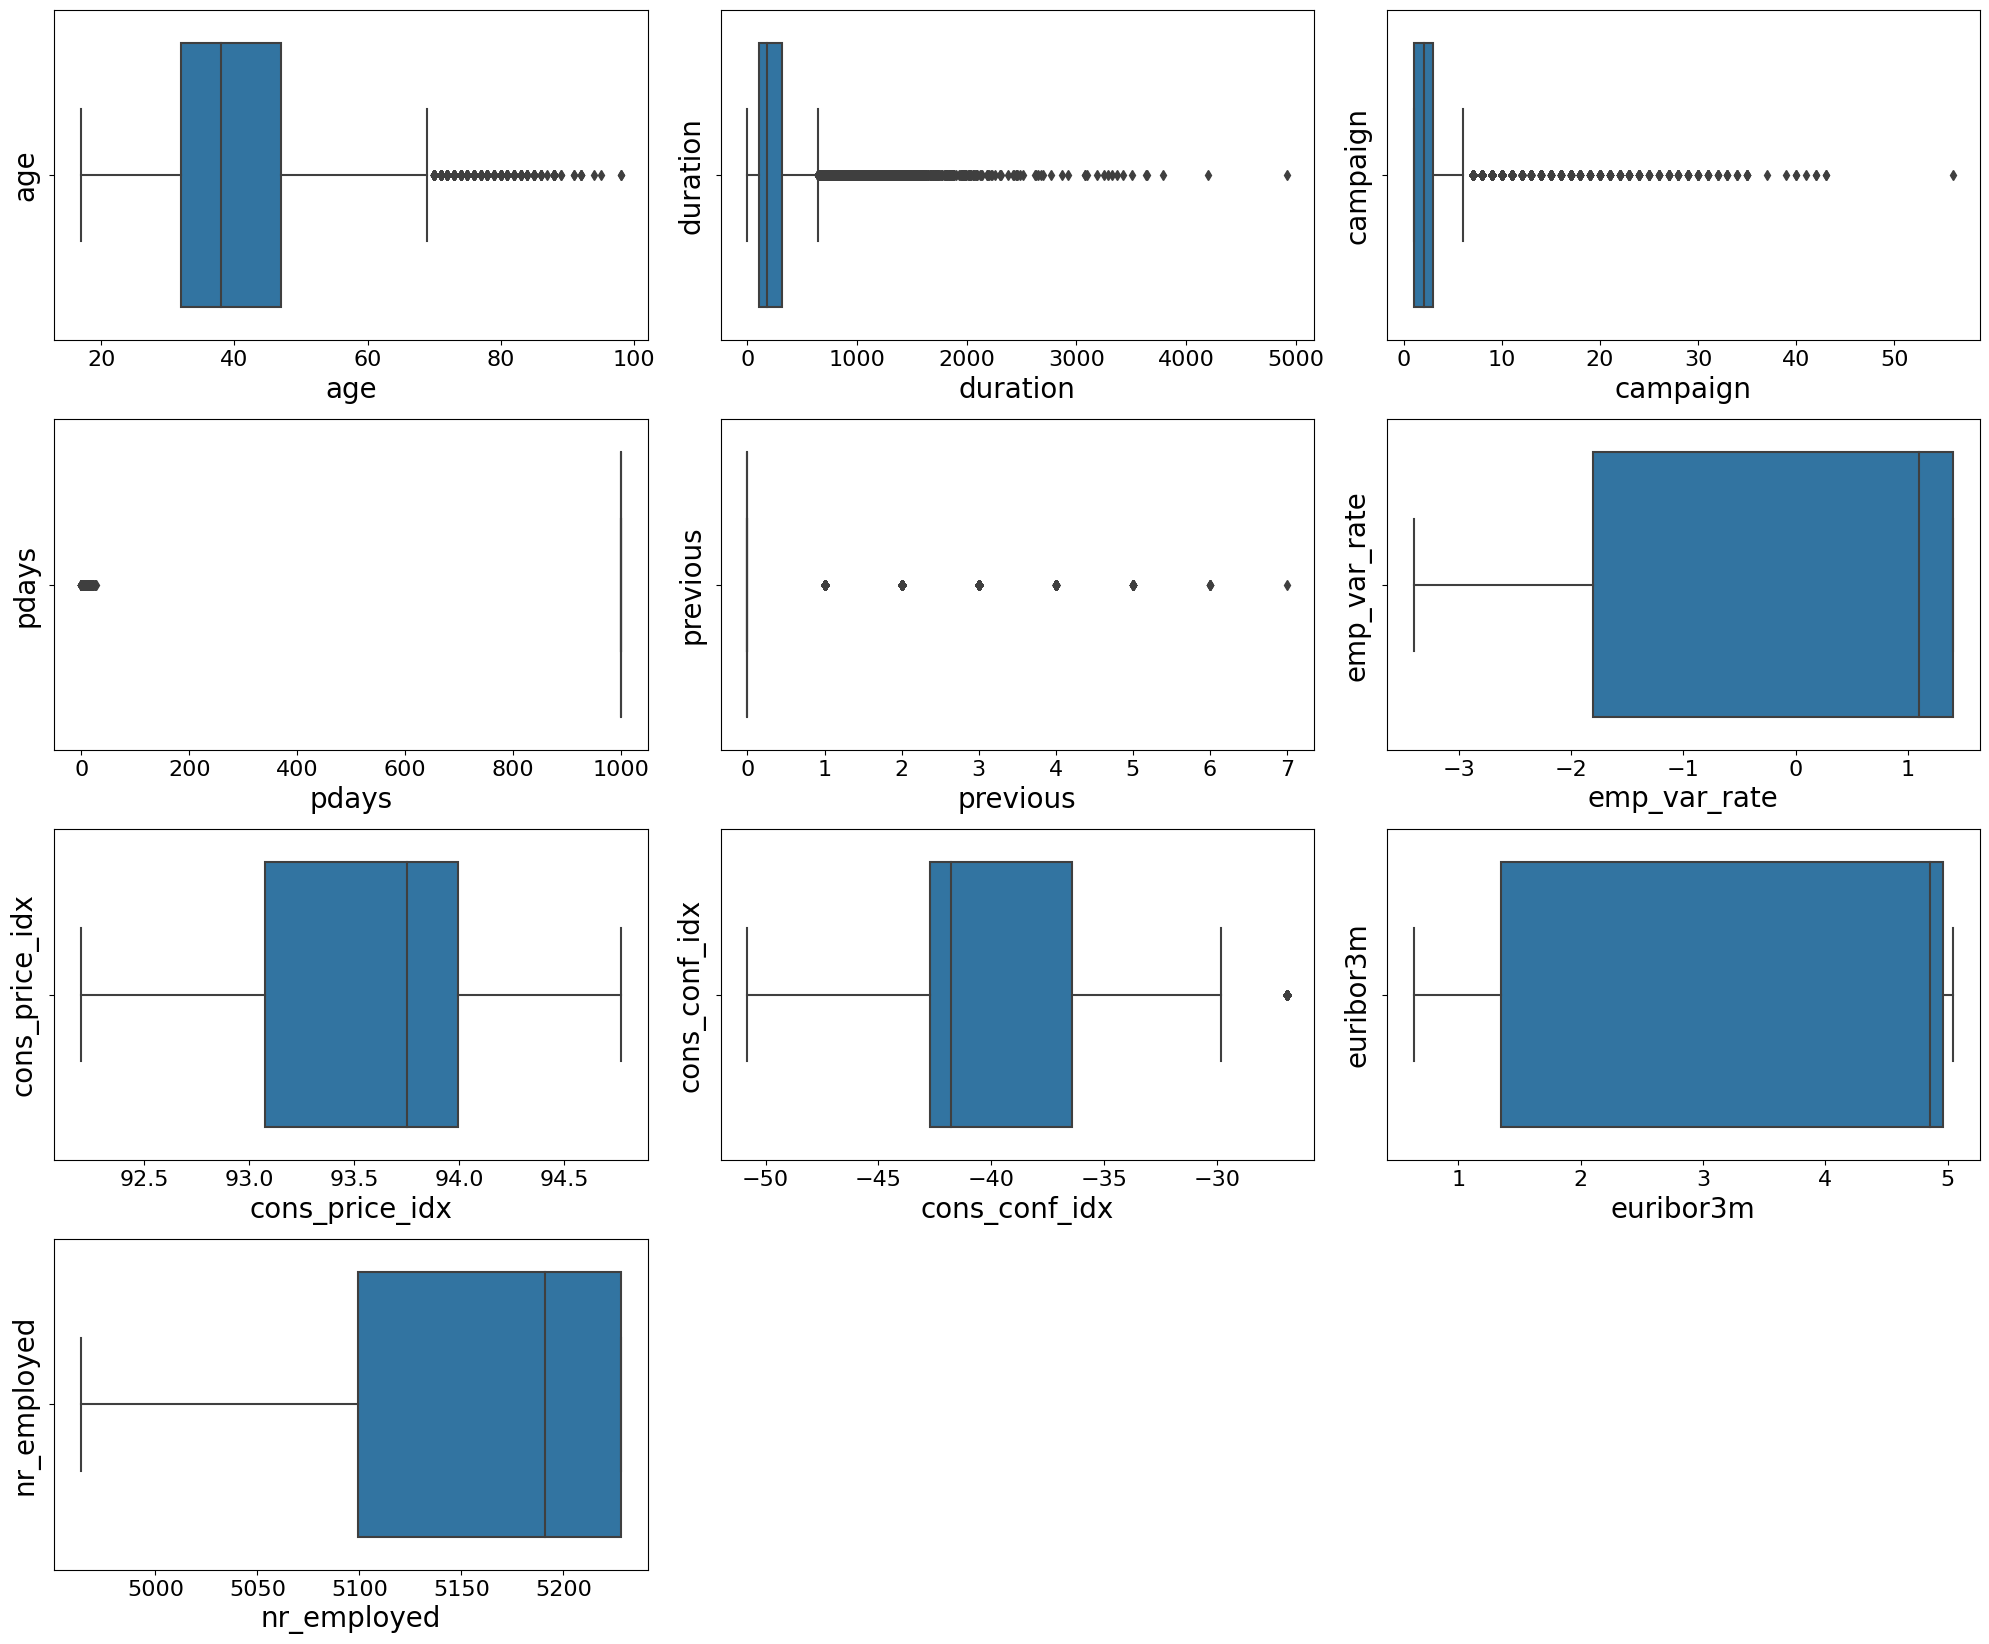

In [805]:
fig = plt.figure(figsize=(20,20))
for i in range(len(numerical_col)):
    plt.subplot(len(numerical_col)//2, 3, i+1)
    ax = sns.boxplot(x = df2[numerical_col[i]])
    ax.set_xlabel(str(numerical_col[i]), fontsize = 20)
    ax.set_ylabel(str(numerical_col[i]), fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

In [806]:
df2.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp_var_rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons_price_idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons_conf_idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr_employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


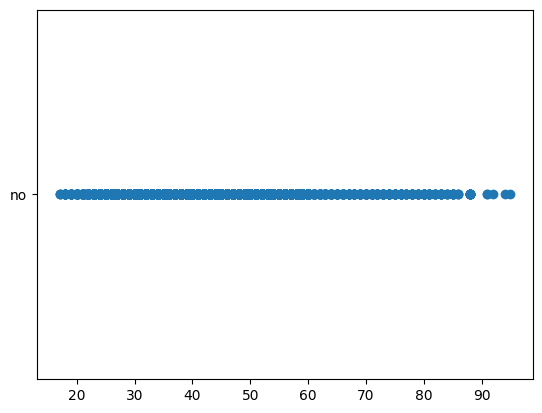

In [807]:
plt.scatter(df2.loc[df2['y']=='no','age'],df2.loc[df2['y']=='no','y'])

In [808]:
# df2['y'][df2['y']=='yes']

df2.loc[df2['y']=='no','y']

0        no
1        no
2        no
3        no
4        no
         ..
41168    no
41170    no
41172    no
41173    no
41175    no
Name: y, Length: 36537, dtype: object

In [809]:
df2.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp_var_rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons_price_idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons_conf_idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr_employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


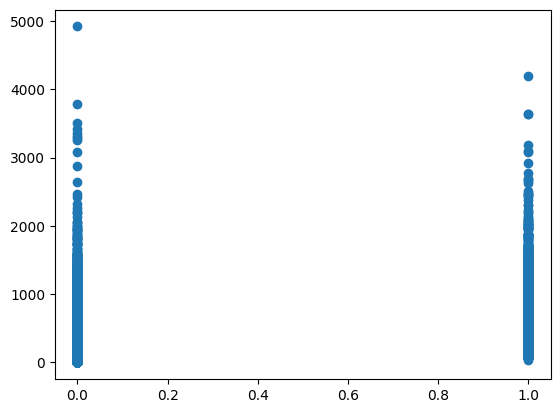

In [810]:
plt.scatter(output_y,df2['duration'])

In [811]:
# map_output = {'yes':1,'no':0}

# df2['y']=df2['y'].map(map_output)

In [812]:
df2.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp_var_rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons_price_idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons_conf_idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr_employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


In [813]:
pd.DataFrame(df2[categorical_col].apply(pd.unique),columns=['values'])

,values
job,"[housemaid, services, admin., blue-collar, tec..."
marital,"[married, single, divorced, unknown]"
education,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
default,"[no, unknown, yes]"
housing,"[no, yes, unknown]"
loan,"[no, yes, unknown]"
contact,"[telephone, cellular]"
month,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
day_of_week,"[mon, tue, wed, thu, fri]"
poutcome,"[nonexistent, failure, success]"


In [814]:
df2[categorical_col].apply(lambda x : pd.Series({'values':x.unique(),'count':x.nunique()})).T

,values,count
job,"[housemaid, services, admin., blue-collar, tec...",12
marital,"[married, single, divorced, unknown]",4
education,"[basic.4y, high.school, basic.6y, basic.9y, pr...",8
default,"[no, unknown, yes]",3
housing,"[no, yes, unknown]",3
loan,"[no, yes, unknown]",3
contact,"[telephone, cellular]",2
month,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ...",10
day_of_week,"[mon, tue, wed, thu, fri]",5
poutcome,"[nonexistent, failure, success]",3


In [815]:
dummy=df2.loc[:, ['loan', 'y']]

In [816]:
dummy=dummy.loc[dummy.loan!='unknown']
dummy.reset_index(drop=True, inplace=True)

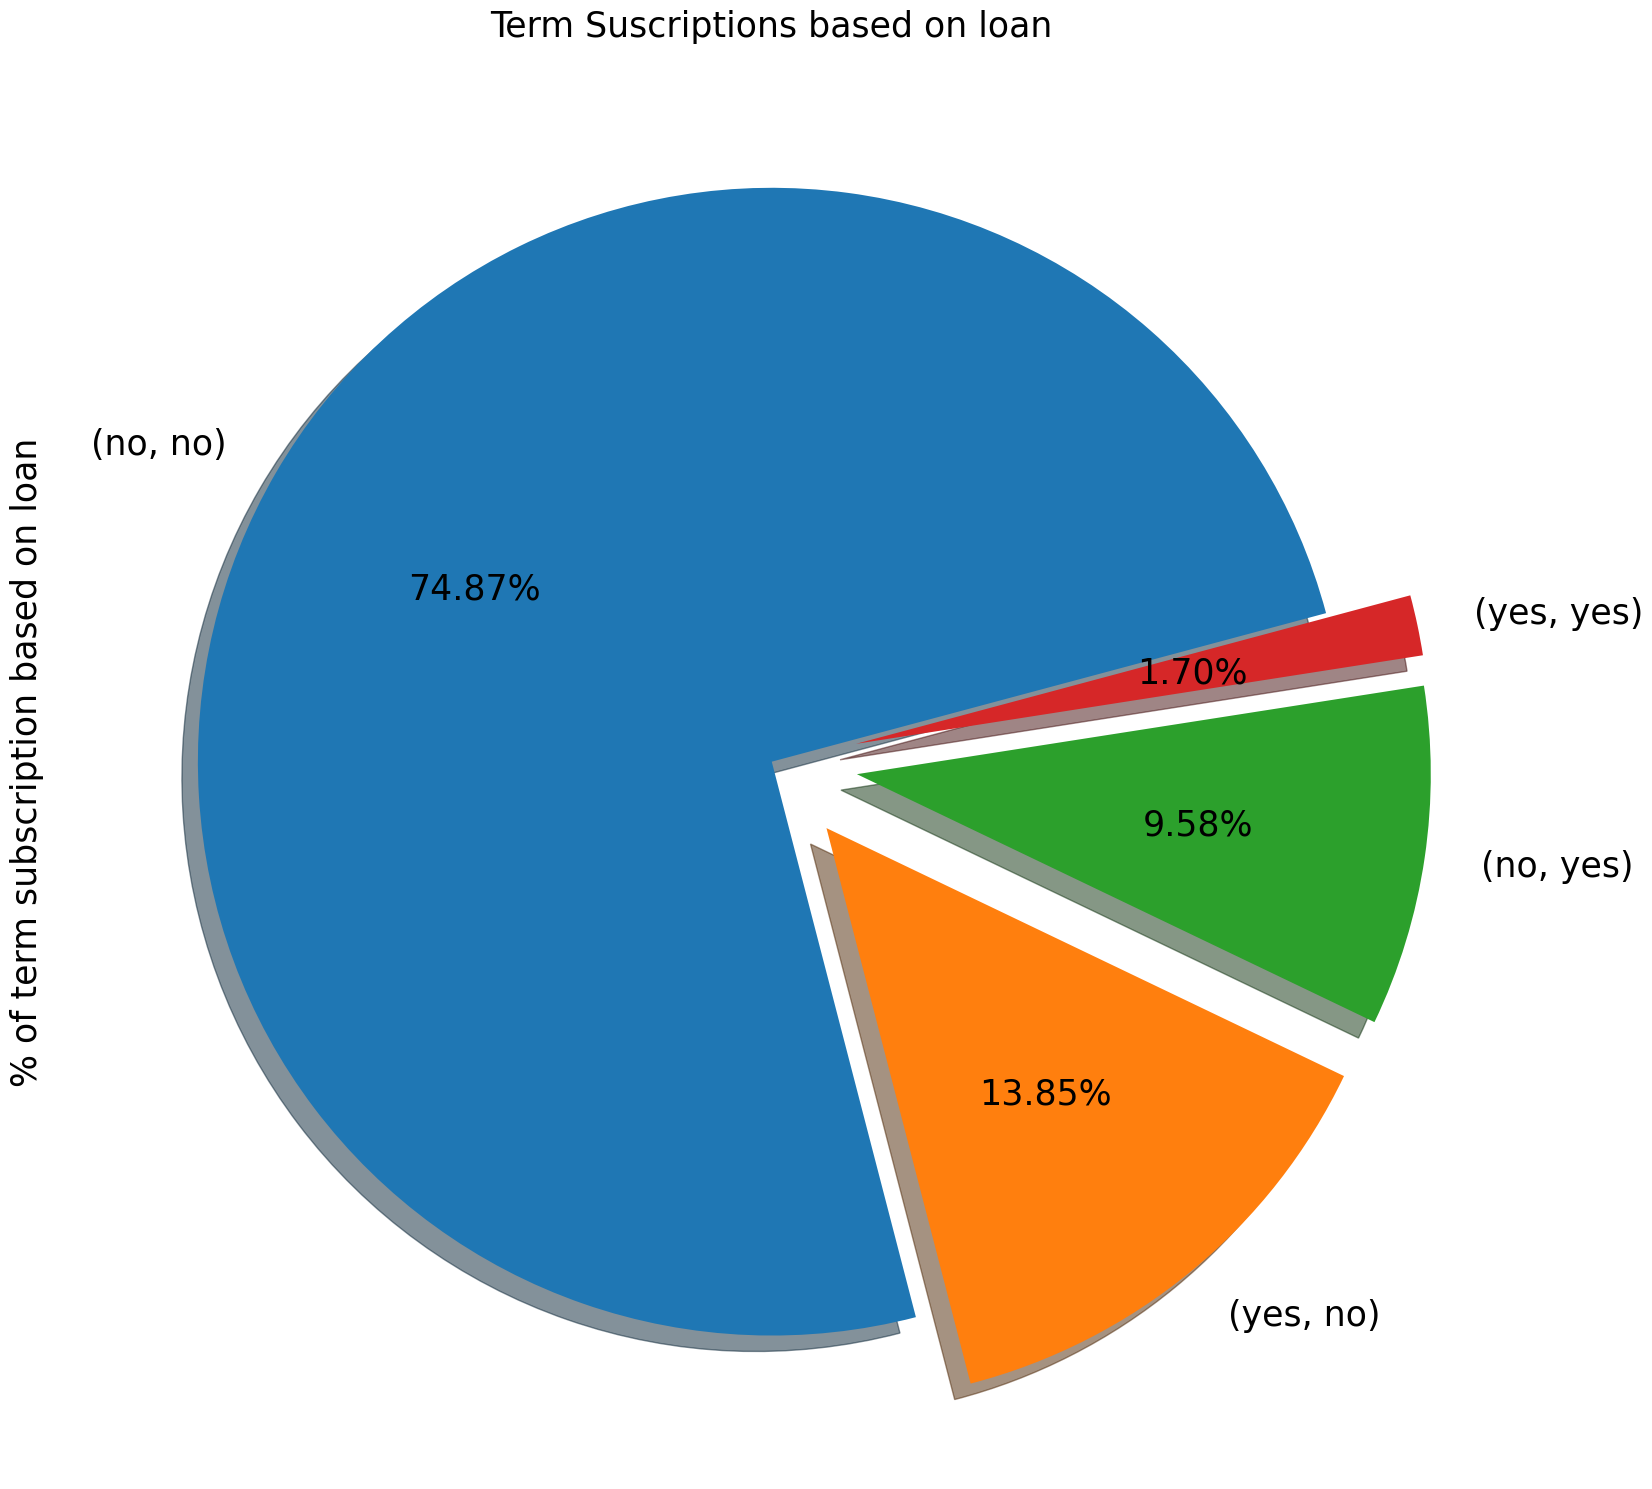

In [817]:
fig = plt.figure(figsize=(20,15))
colors = ['blue','green']
dummy.value_counts().plot.pie(explode=[0,0.15,0.15,0.15],
                              fontsize=25, autopct='%1.2f%%'
                             , shadow=True
                             , startangle=15)
plt.title('Term Suscriptions based on loan', fontsize=25)
plt.ylabel('% of term subscription based on loan',fontsize=25)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='education', ylabel='age'>

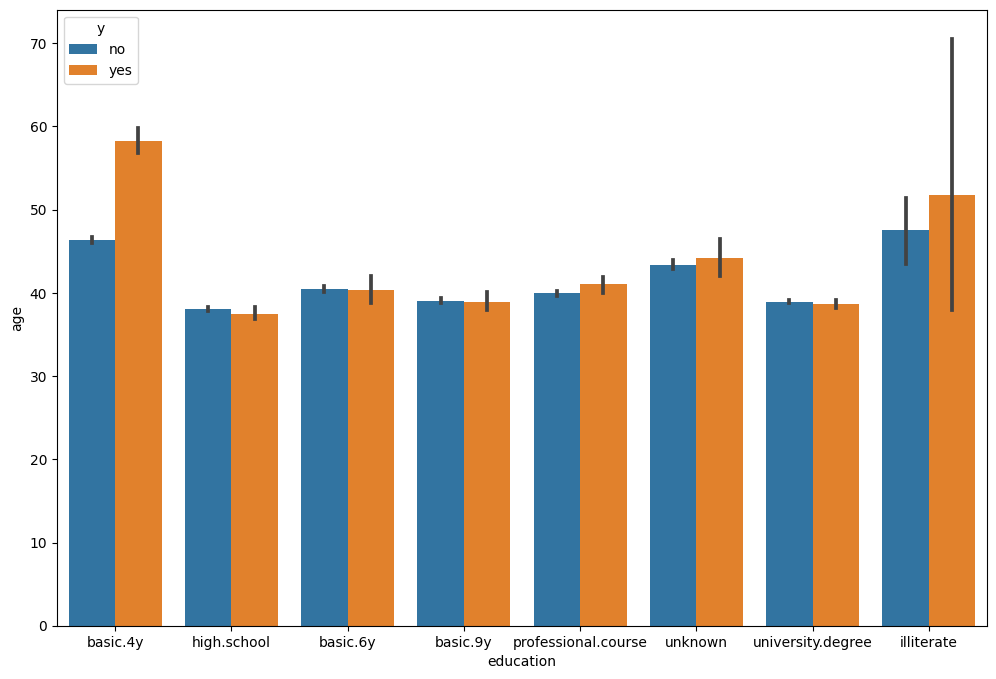

In [818]:
fig = plt.figure(figsize=(12,8))
sns.barplot(x='education',y='age',hue='y',data=df2)

# Bivarte

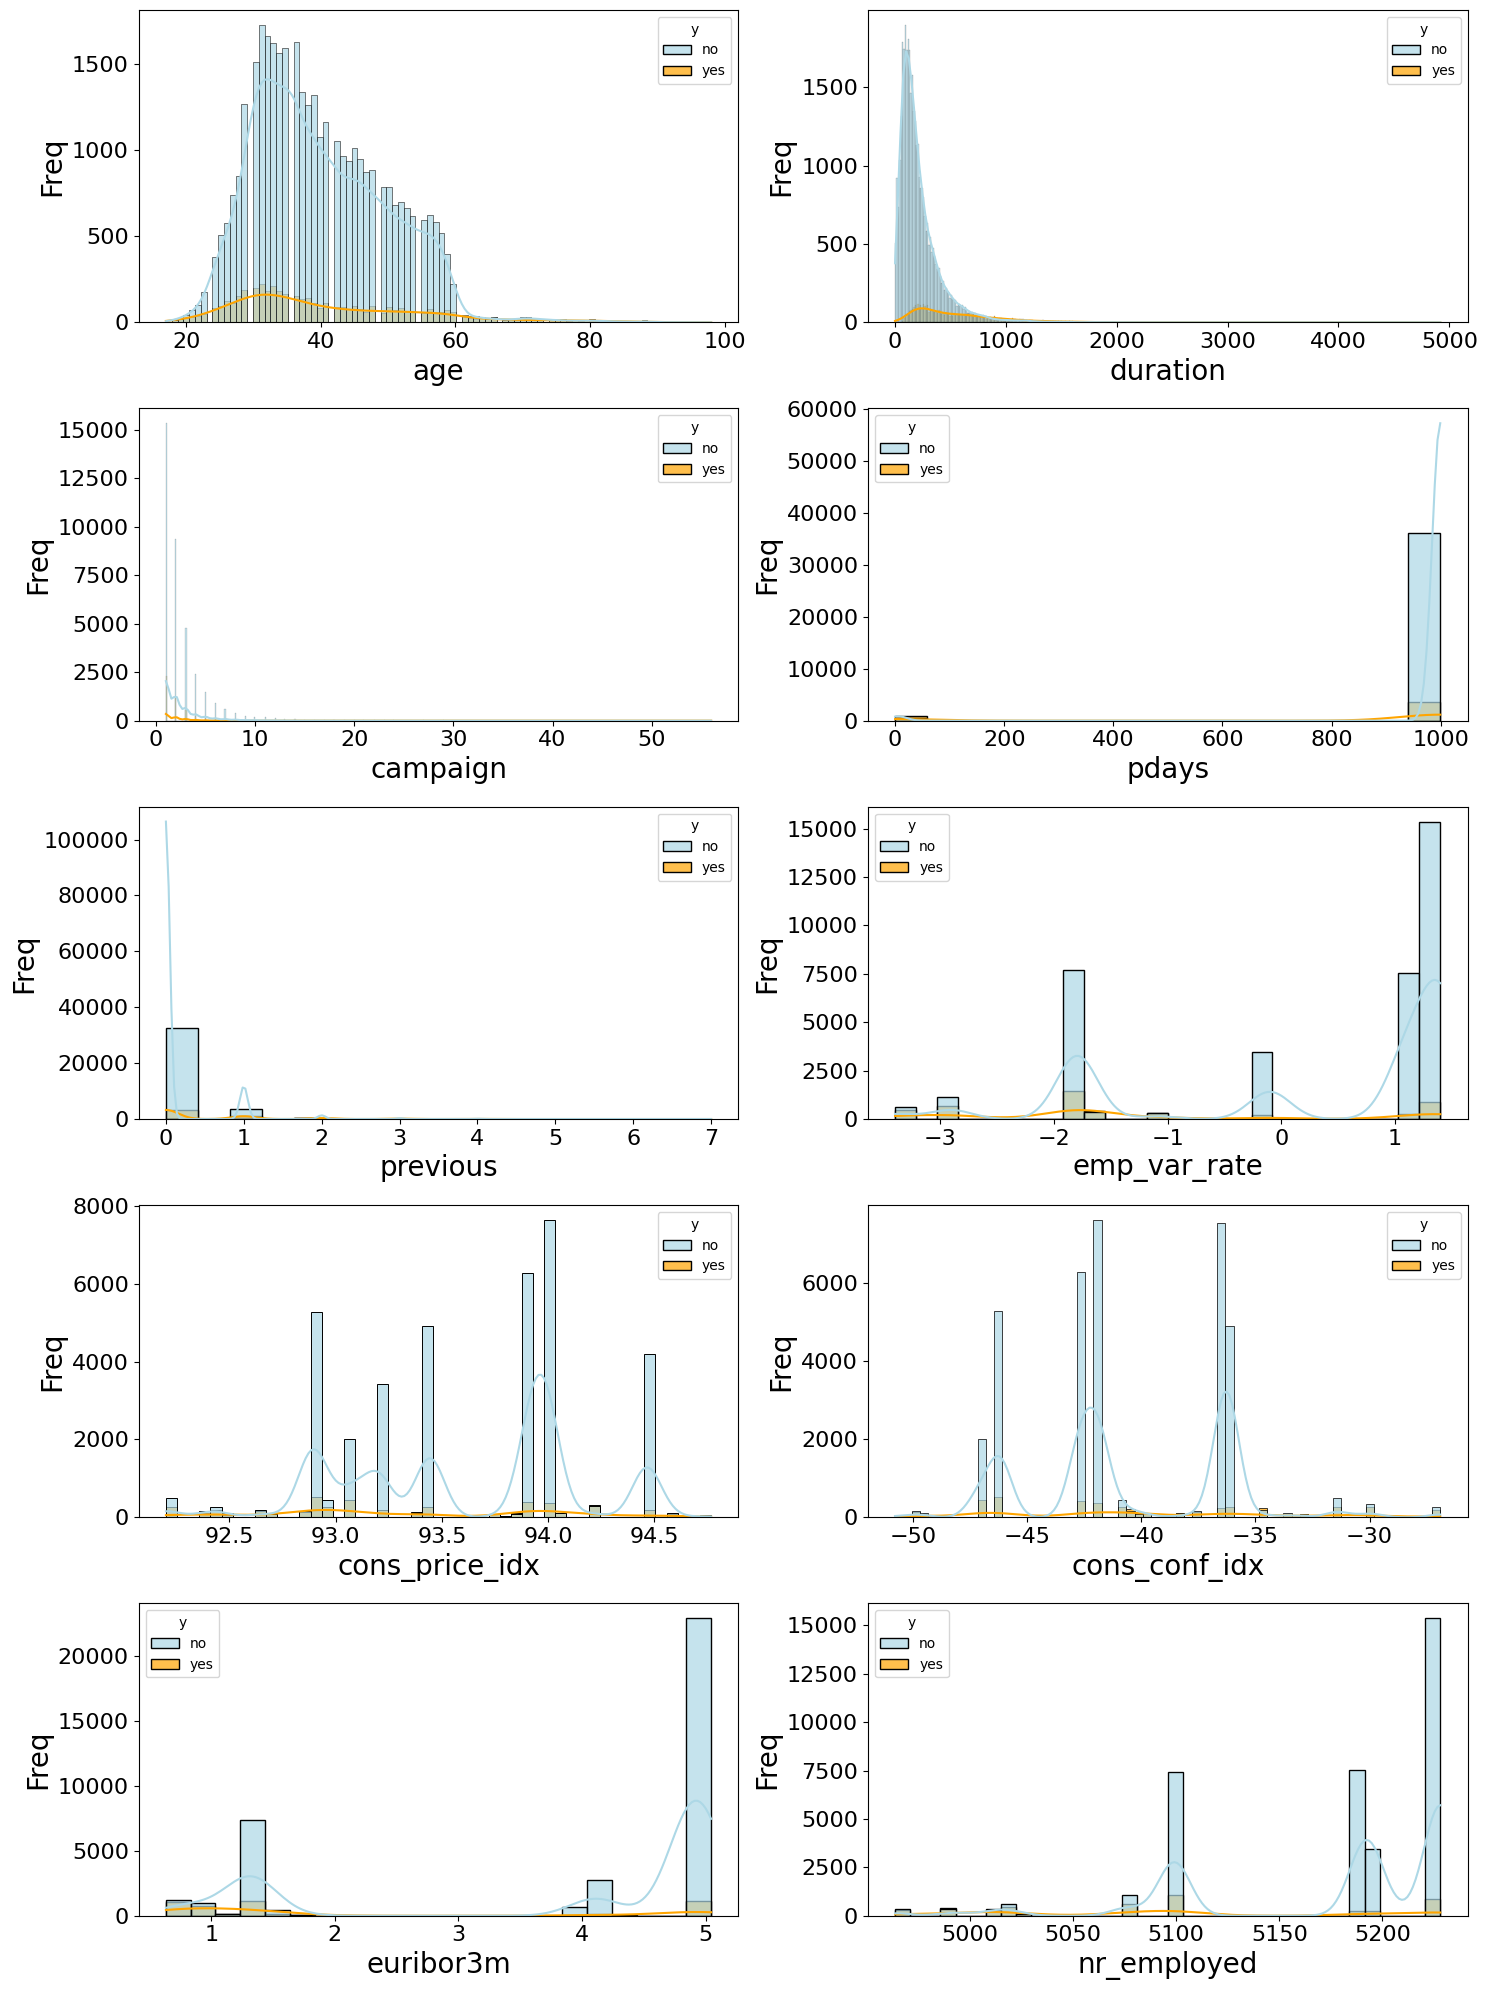

In [1001]:
plt.figure(figsize=(20,20))
for i in range(len(numerical_col)):
    plt.subplot(len(numerical_col)//2,2,i+1)
    ax = sns.histplot(
    x = df2[numerical_col[i]],
    kde=True,
    palette = {'no':'lightblue','yes':'orange'},
    alpha = 0.7   
    ,hue=df2.y)
    ax.set_xlabel(str(numerical_col[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()
    

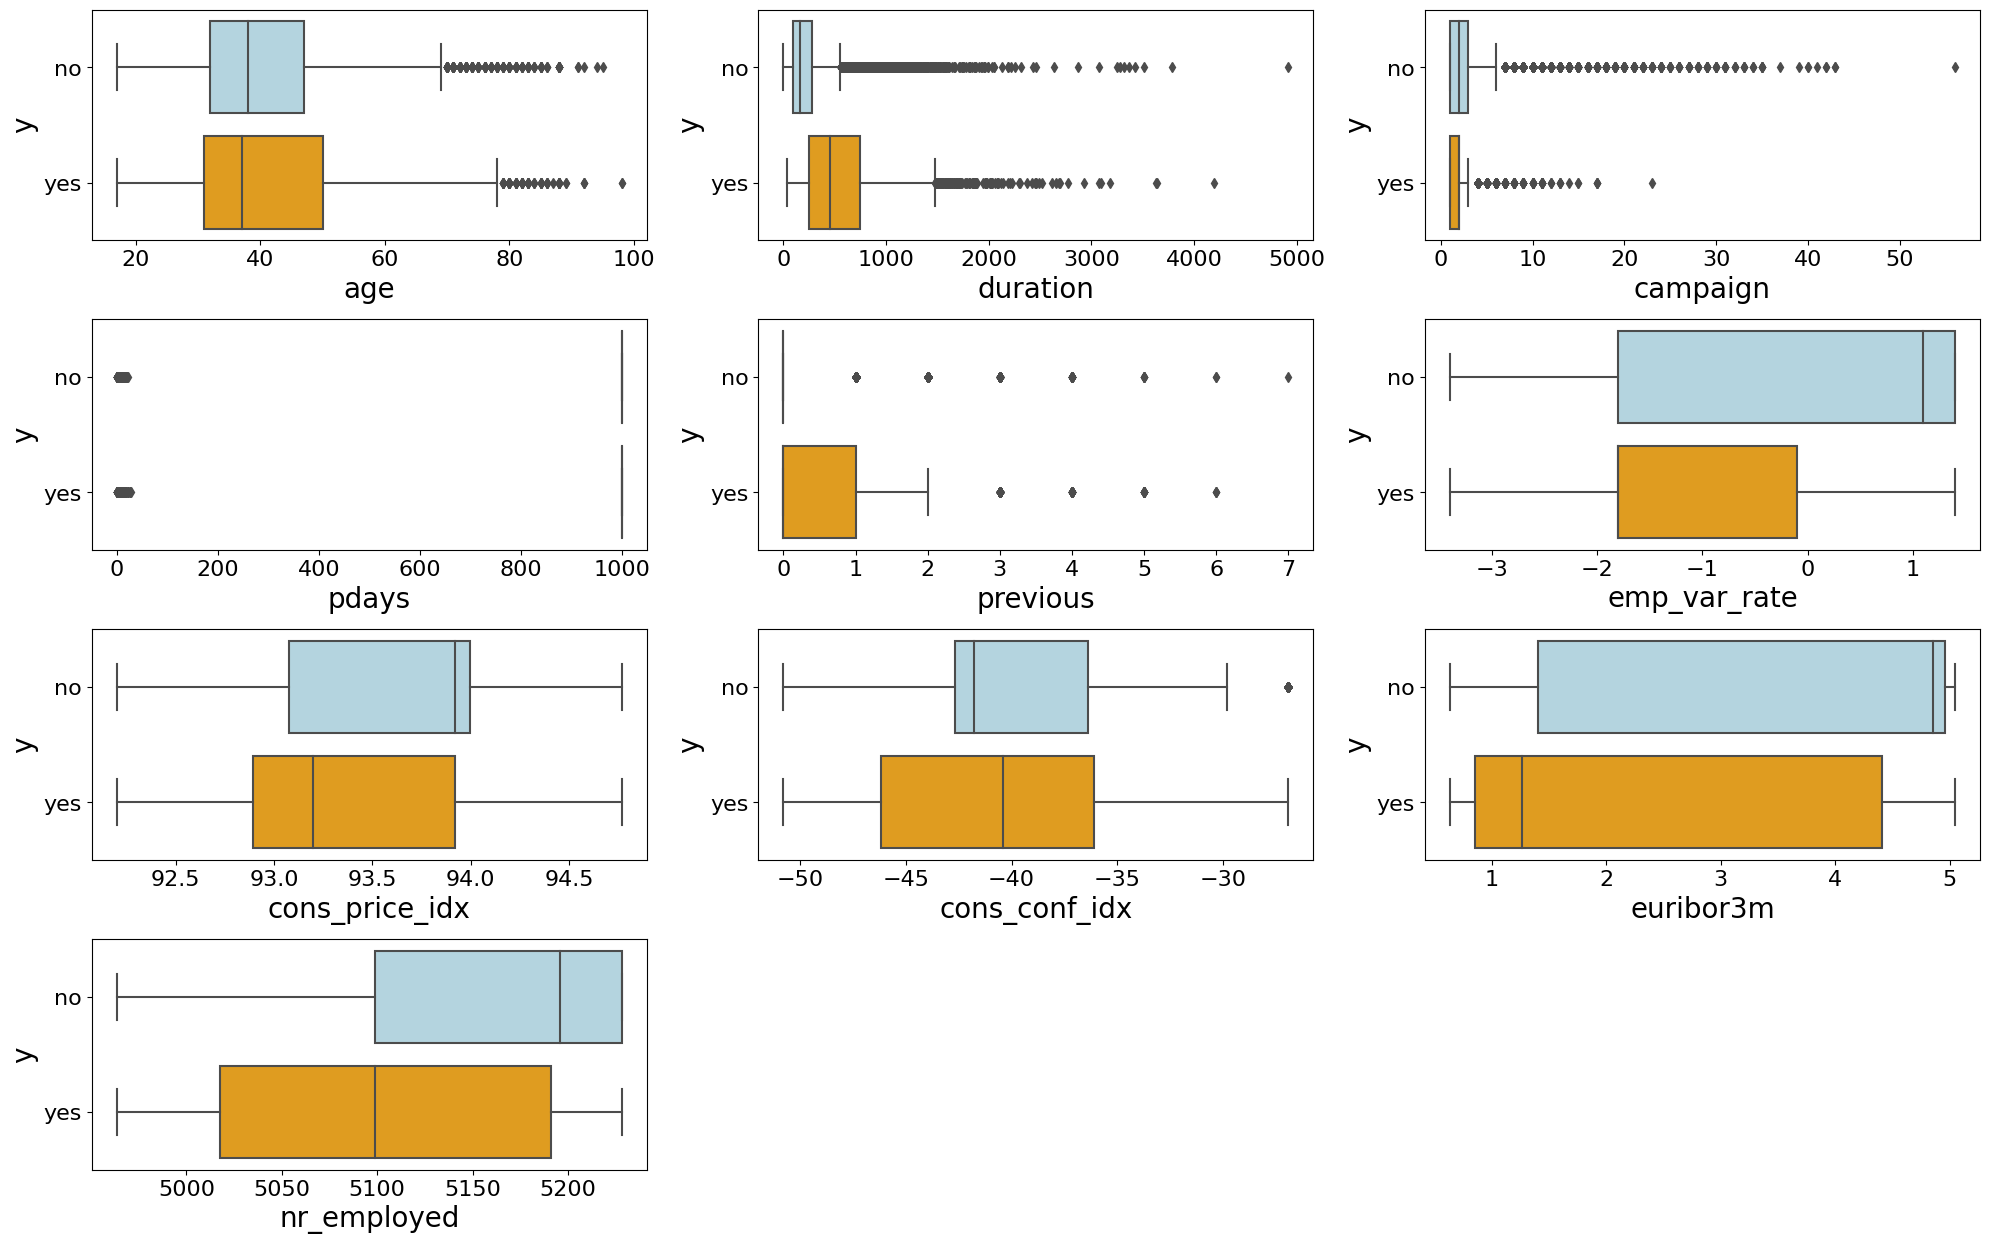

In [820]:
plt.figure(figsize=(20,15))
for i in range(len(numerical_col)):
    plt.subplot(len(numerical_col)//2,3,i+1)
    ax = sns.boxplot(
    x = df2[numerical_col[i]],
    y=df2.y,
    palette = {'no':'lightblue','yes':'orange'},
 
    )
    ax.set_xlabel(str(numerical_col[i]), fontsize = 20)
    ax.set_ylabel("y", fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

Ratio of target subscription (yes:no) 11.266271614532737 : 88.73372838546726


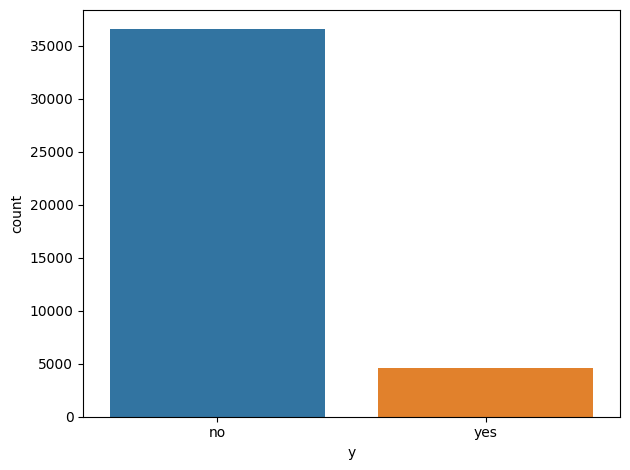

In [821]:
ratio_yes = df2.loc[df2.y=='yes','y'].count() / df2.y.shape[0] * 100
ratio_no = 100 - ratio_yes
print('Ratio of target subscription (yes:no)',ratio_yes,':', ratio_no)
sns.countplot(data=df2, x='y')
plt.tight_layout()
plt.show()

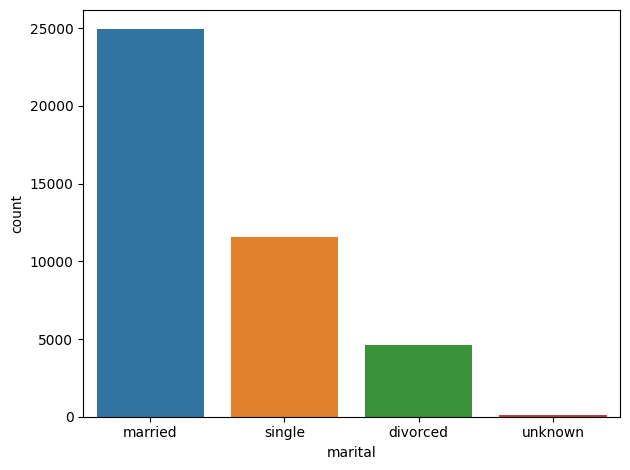

In [822]:
sns.countplot(data=df2, x='marital')
plt.tight_layout()
plt.show()

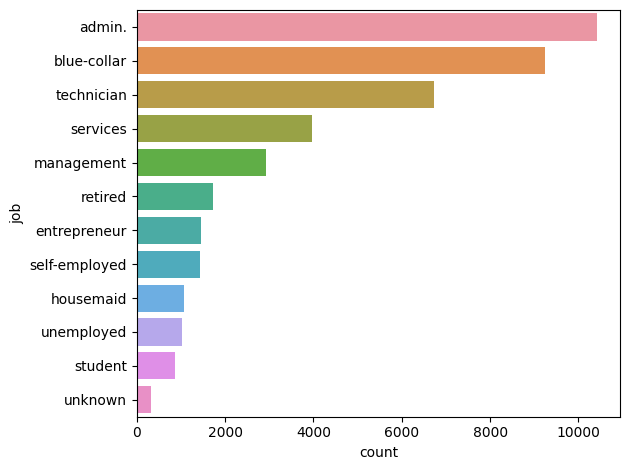

In [823]:
sns.countplot(data=df2, y='job',
             order = df2.job.value_counts().sort_values(ascending=False).index)
plt.tight_layout()
plt.show()


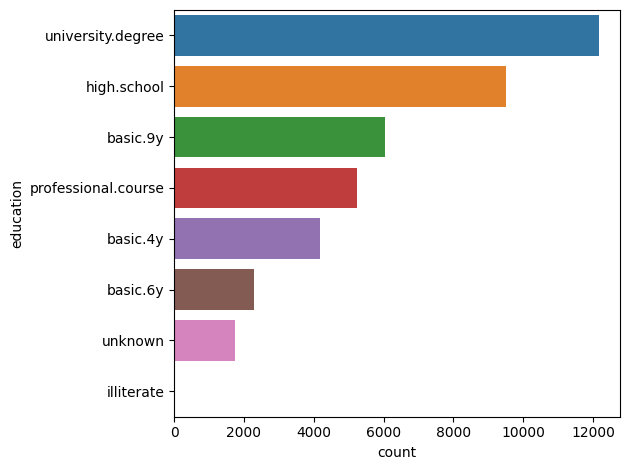

In [824]:
sns.countplot(data=df2, y='education',
             order = df2.education.value_counts().sort_values(ascending=False).index)
plt.tight_layout()
plt.show()


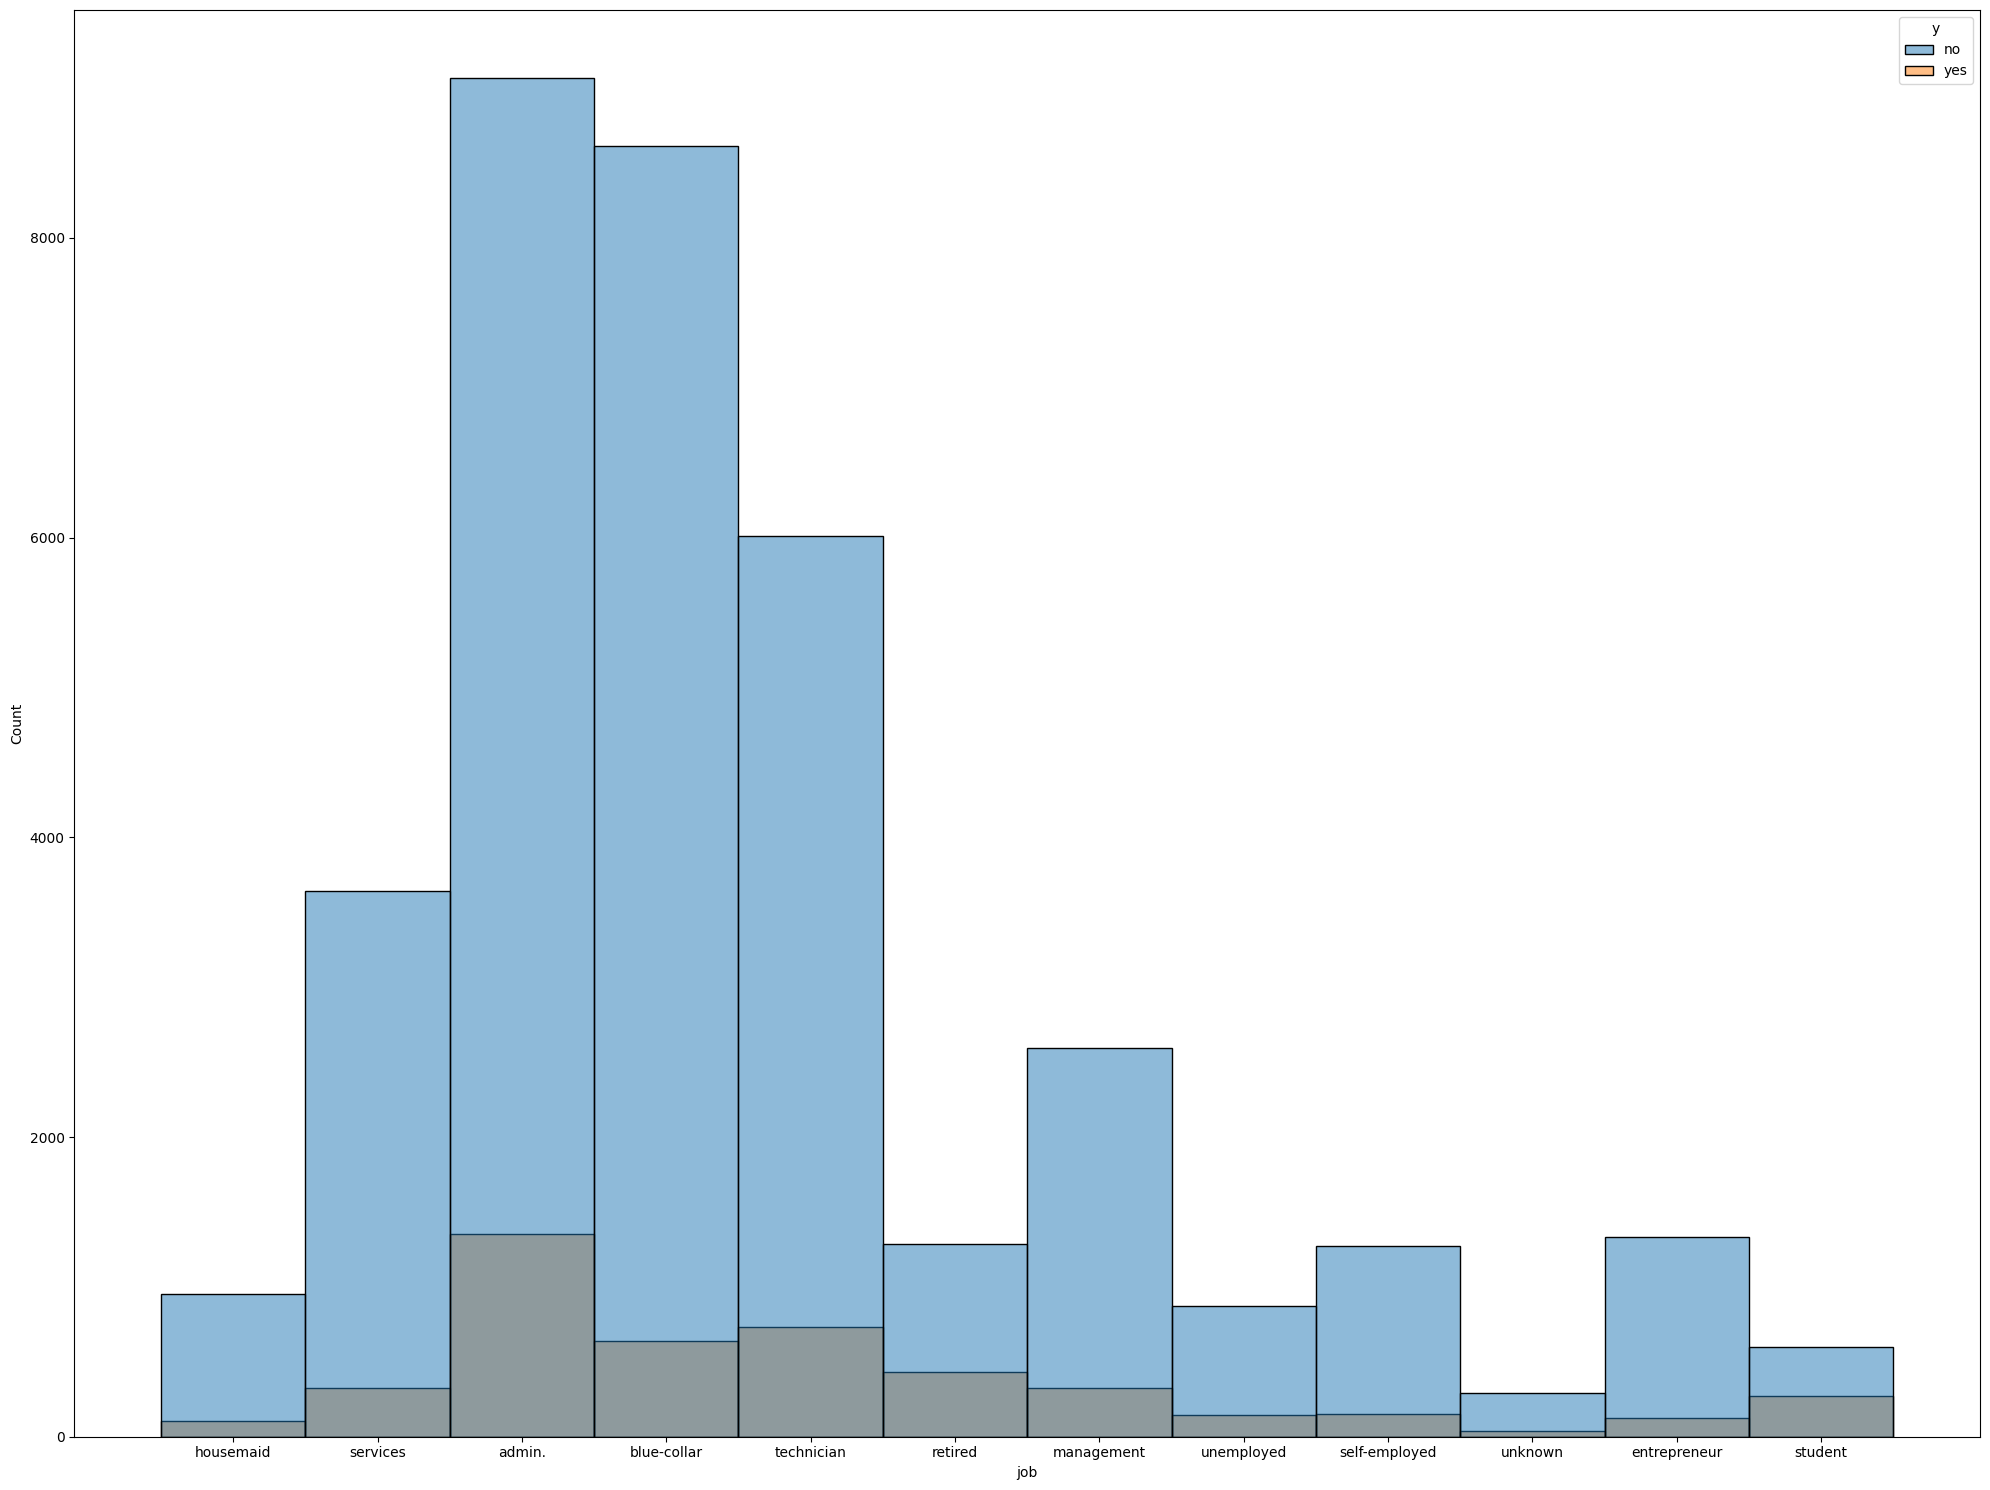

In [825]:
plt.figure(figsize=(20,15))
sns.histplot(
x=df2.job
,hue=df2.y)
plt.tight_layout()
plt.show()

In [826]:
df2.groupby(['loan','y']).size()

loan     y  
no       no     30089
         yes     3849
unknown  no       883
         yes      107
yes      no      5565
         yes      683
dtype: int64

In [827]:
df2.groupby(['job','y']).size()

job            y  
admin.         no     9068
               yes    1351
blue-collar    no     8615
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1284
               yes     434
self-employed  no     1272
               yes     149
services       no     3644
               yes     323
student        no      600
               yes     275
technician     no     6009
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
dtype: int64

In [828]:
df2.groupby(['marital','y']).size()

marital   y  
divorced  no      4135
          yes      476
married   no     22390
          yes     2531
single    no      9944
          yes     1620
unknown   no        68
          yes       12
dtype: int64

In [829]:
df2.groupby(['education','y']).size()

education            y  
basic.4y             no      3748
                     yes      428
basic.6y             no      2103
                     yes      188
basic.9y             no      5572
                     yes      473
high.school          no      8481
                     yes     1031
illiterate           no        14
                     yes        4
professional.course  no      4645
                     yes      595
university.degree    no     10495
                     yes     1669
unknown              no      1479
                     yes      251
dtype: int64

In [830]:
df2.groupby(['poutcome','y']).size()

poutcome     y  
failure      no      3647
             yes      605
nonexistent  no     32411
             yes     3140
success      no       479
             yes      894
dtype: int64

In [831]:
df2.groupby(['month','y']).size()

month  y  
apr    no      2092
       yes      539
aug    no      5521
       yes      655
dec    no        93
       yes       89
jul    no      6521
       yes      648
jun    no      4759
       yes      559
mar    no       270
       yes      276
may    no     12881
       yes      886
nov    no      3684
       yes      416
oct    no       402
       yes      315
sep    no       314
       yes      256
dtype: int64

In [832]:
df2.groupby(['y', 'default']).size()

y    default
no   no         28381
     unknown     8153
     yes            3
yes  no          4196
     unknown      443
dtype: int64

In [1003]:
df2.groupby(['y']).median()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
no,38.0,163.5,2.0,999.0,0.0,1.1,93.918,-41.8,4.857,5195.8
yes,37.0,449.0,2.0,999.0,0.0,-1.8,93.200,-40.4,1.266,5099.1


In [833]:
dummy_cate = [i for i in categorical_col if i not in ('job', 'education','y')]
dummy_cate

['marital',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

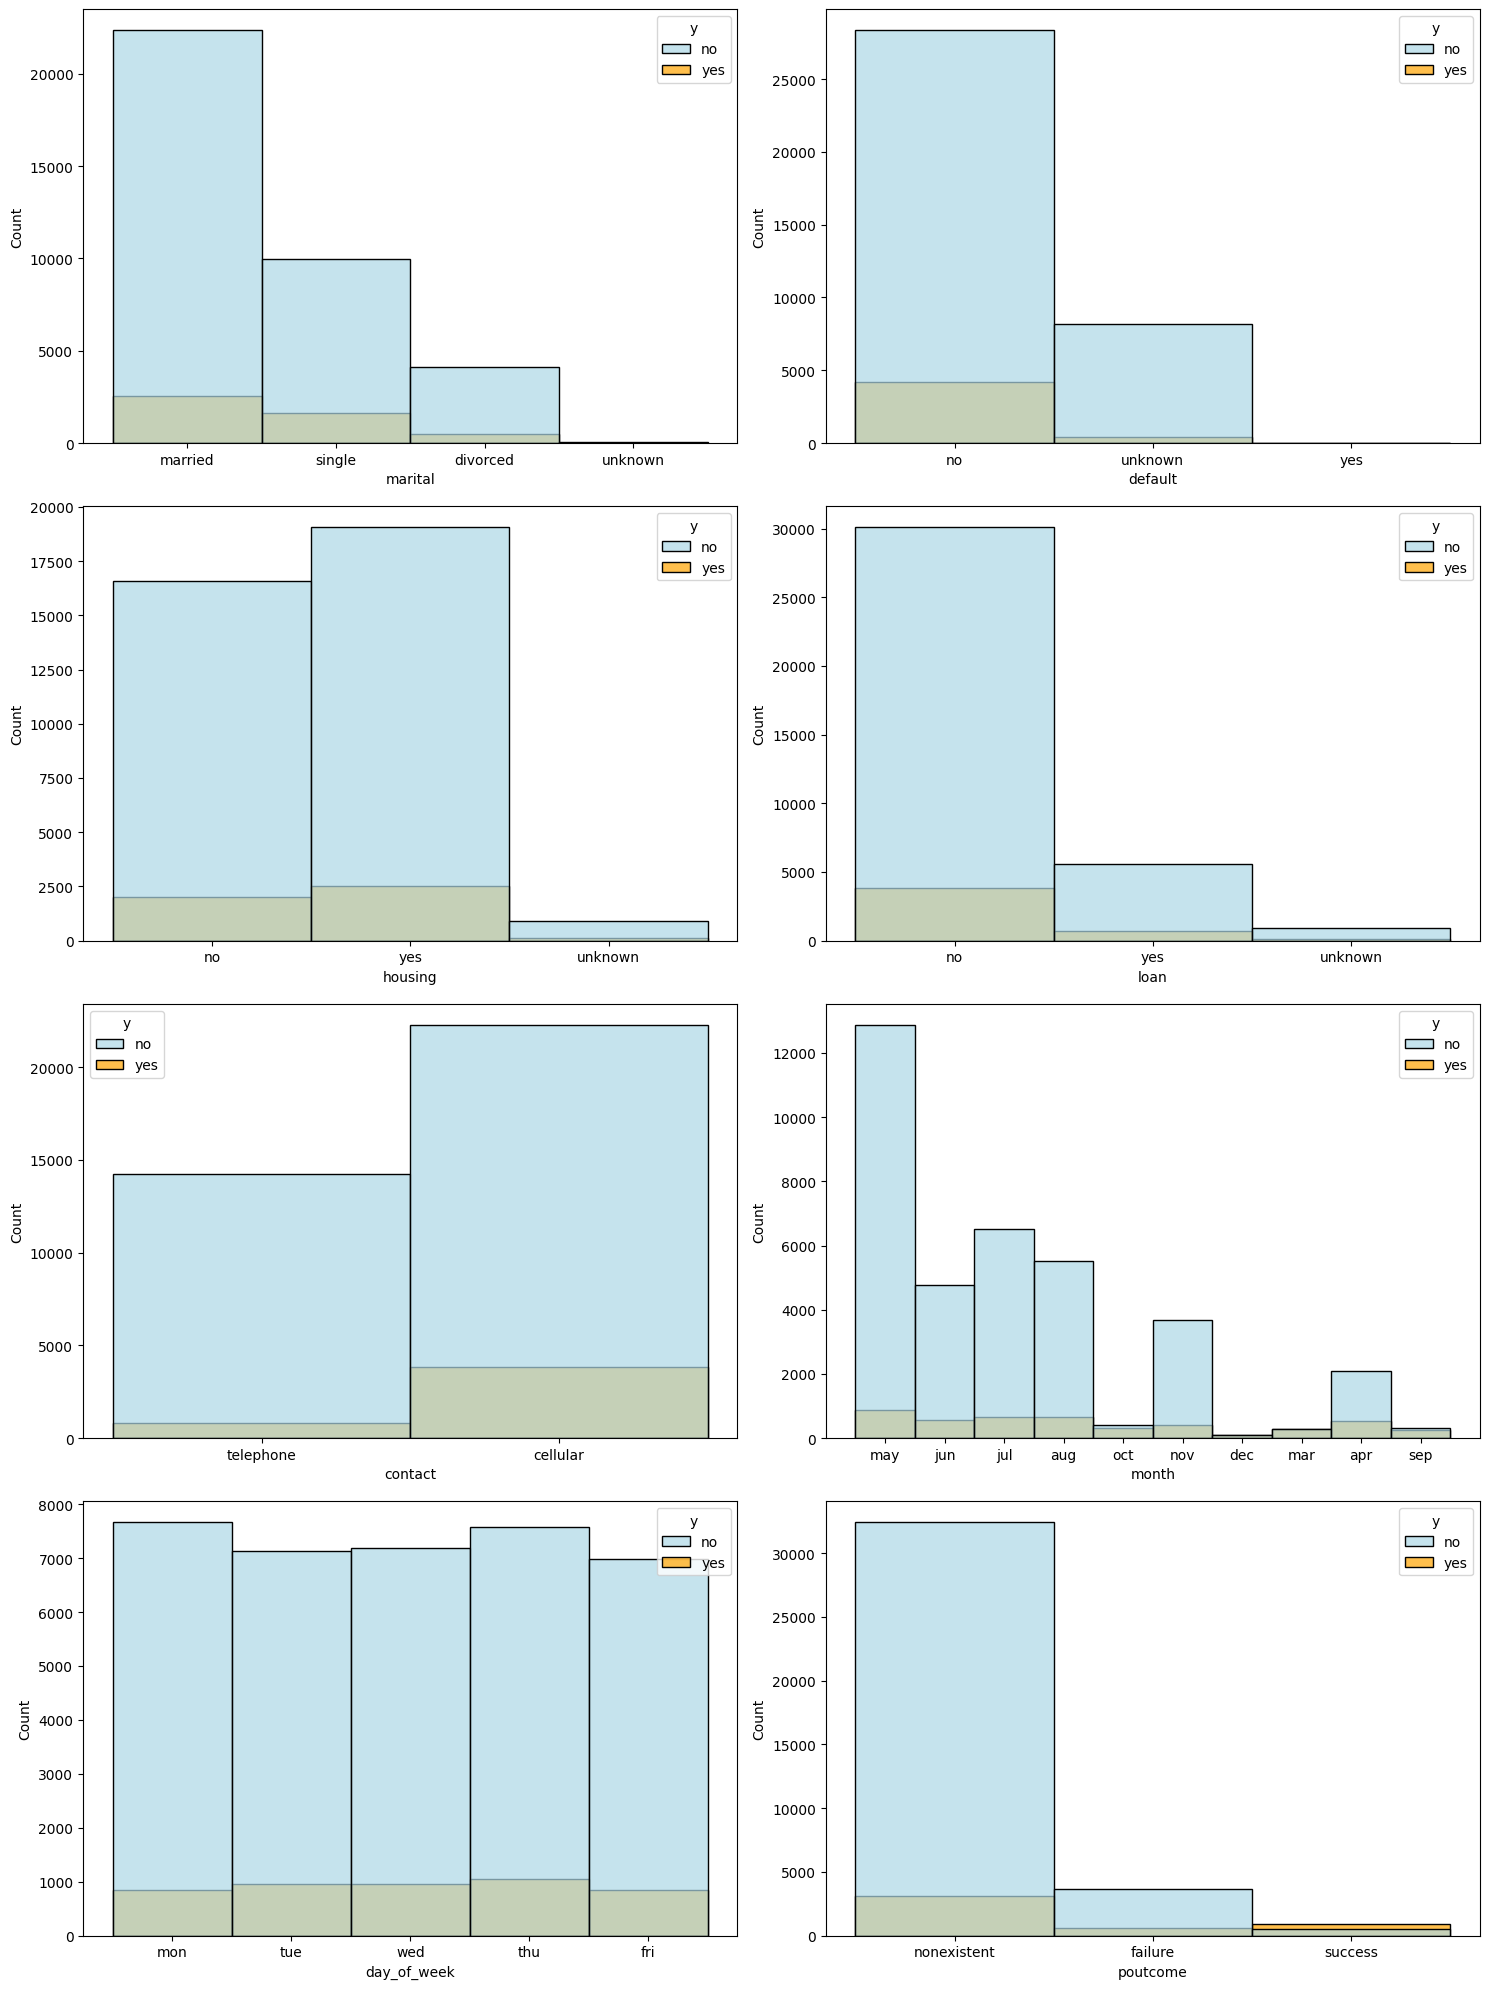

In [1005]:
plt.figure(figsize=(15,20))
for i in range(len(dummy_cate)):
    plt.subplot(len(dummy_cate)//2,2,i+1)
    ax = sns.histplot(
    x = df2[dummy_cate[i]],
    hue=df2.y,
    alpha=0.7,
    palette={'yes':'orange','no':'lightblue'})
plt.tight_layout()
plt.show()

Majority of people have the nonexistent outcomes of the previous marketing campaign (poutcome), no personal loan (loan), no credit in default.

Majority of people have a job as admin, blue-collar, and technician.

Majority of people have a university degree.

Majority of people are married.

Majority of people have no default credit.

Majority of people have housing loans.

Majority of people have no personal loan.

Majority of people have cellular contacts.

Majority of people are last contacted in may.

Majority of people have the nonexistent outcomes from the previous marketing campaign.

In [835]:
df2[categorical_col]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41171,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41172,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41173,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41174,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


<AxesSubplot:>

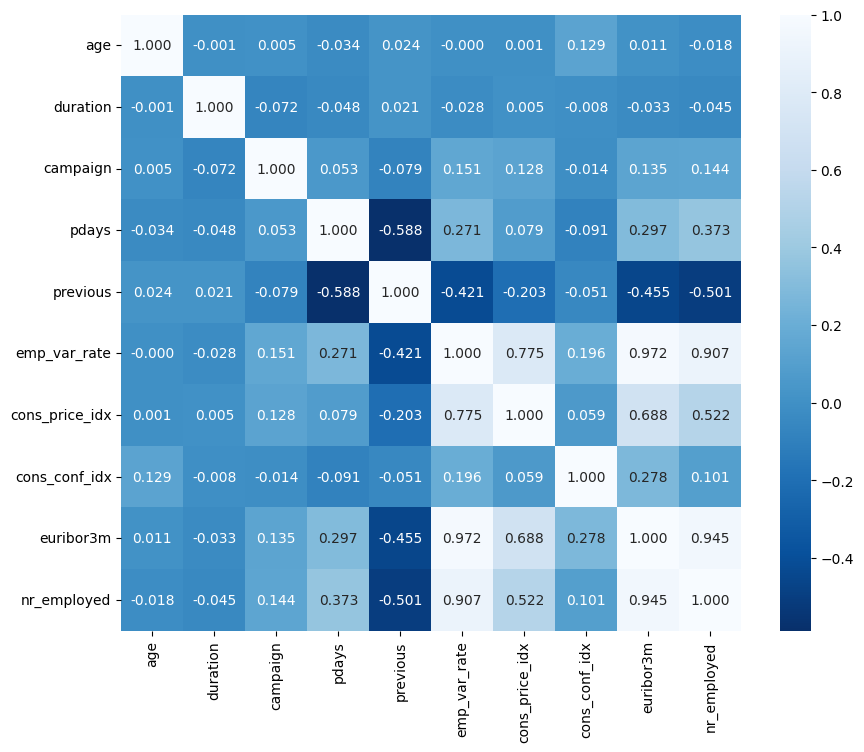

In [836]:
corr_ = df2[numerical_col].corr()
plt.figure(figsize = (10, 8))
sns.heatmap(
    corr_,
    annot = True,
    fmt = '.3f',
    cmap = 'Blues_r'
)

Those with higher euribor3m and nr_employed are mostly likely to have age below ~60.

Those who have higher euribor3m, are most likely to have an age below ~60.

Those who have been contacted multiple times before this campaign (previous) started:

Never have a long duration during the last contact (duration),

Never have greater number of contacts during this campaign (campaign),

Never have greater value of euribor3m and nr_employed.

Those who have lower emp_var_rate and nr_employed have lower number of contacts during this campaign (campaign) and also lower duration during the last contact (duration).

Those who have greater emp_var_rate have less number of contacts before this campaign (previous)

emp_var_rate has positive linear relationship with cons_price_idx, euribor3m, and nr_employed.

cons_price_idx has positive linear relationship with euribor3m and nr_employed.

euribor3m has positive linear relationship with nr_employed.

Those who have lower pdays(number of days that passed by after the client was last contacted from a previous campaign) also has lower euribor3m.

# Categorical features

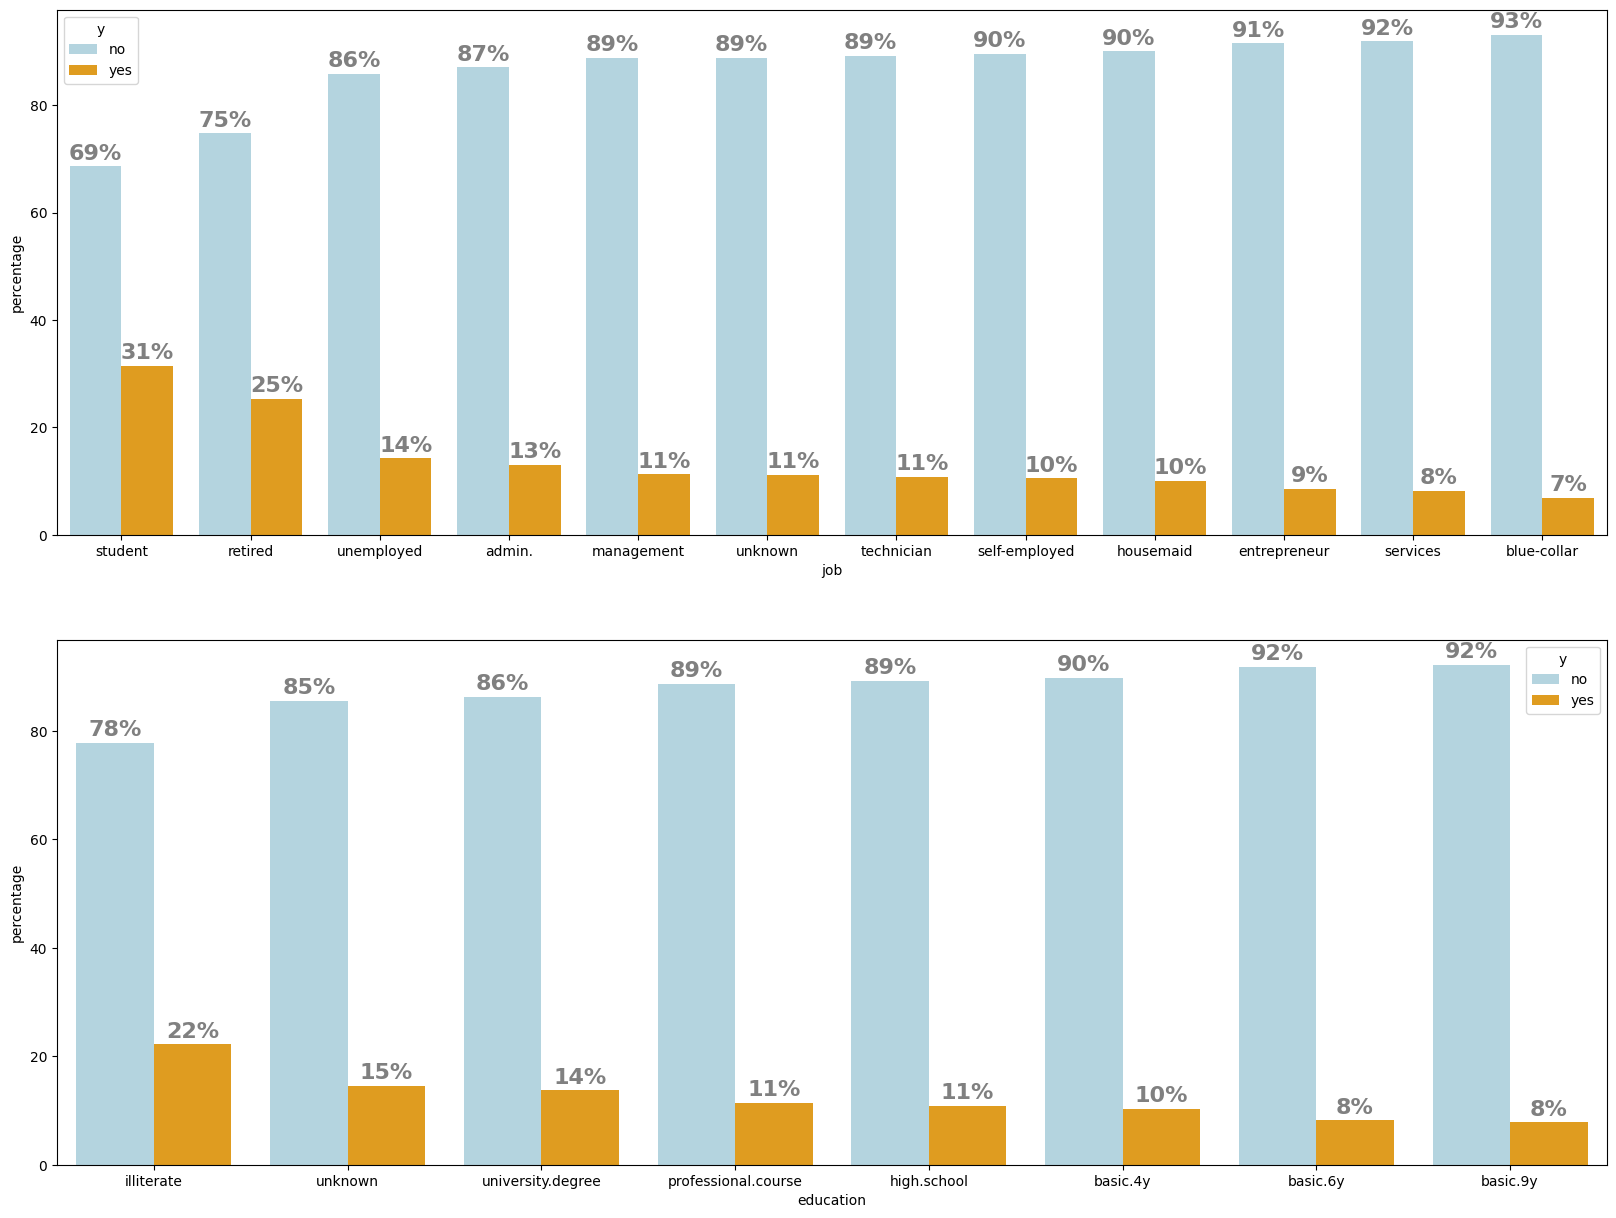

In [837]:
plt.figure(figsize = (20, 15))
ls=['job','education']
for i in range(2):
    dist = df2.groupby([str(ls[i]), "y"]).count()[["age"]]
    cat_group = df2.groupby([str(ls[i])]).count()[["age"]]
    dist["percentage"] = dist.div(cat_group, level = str(ls[i])) * 100
    dist.reset_index(inplace = True)
    dist.columns = [str(ls[i]), "y", "count", "percentage"]
    plt.subplot(2,1,i+1)
    ax=sns.barplot(
    x=str(ls[i]),
    y = 'percentage',
    hue = 'y',    
    data = dist,
    order = dist.iloc[dist[dist['y'] == "yes"]['percentage'].sort_values(ascending = False).index][str(ls[i])],
    palette={'yes':'orange','no':'lightblue'})
    
    for p in ax.patches:
        ax.annotate(
        format(p.get_height(), '.0f') + "%",
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, 5), 
        textcoords = 'offset points',
        color = 'grey'
    )

The job features has a variety of ratio between its category. There is a student and retired who seems to have a high ratio that subscribed to the product. After cross-check with the absolute value in the previous plot, we found out that the total amount of people who falls into this category is low compared to other categories that have a greater total of people within groups.

For the education features, those who have the top 2 highest ratios are also coming from categories that have less total of people within the group. Unlike the previous top 2 ratio, the 3rd-5th highest ratio is coming from categories that have a greater total of people within its group.

For marital features, we know that people whose statuses are unknown have the highest ratio, but if we take a look at the total amount of people in this group, it's not significant because we have a small proportion of people who fall into this group. The 2nd highest ratio is single and it has 2nd highest total of people within its group, so this ratio is significant compared to the highest ratio.

The majority of people who don't have default credit, have the highest ratio of people who subscribed to the 
term deposit.

A default occurs when a borrower is unable to make timely payments, misses payments, or avoids or stops making payments on interest or principal owed. Thus, it makes sense that people who are not able to make timely payments will not subscribe to a term deposit.

People who have housing loans have a higher ratio of people who subscribed.
The ratio of people who have loans seems to be equal, but from the total amount of people within the group, those who have no personal loan have a higher amount of people who subscribed.

Majority of people who have been contacted on their cellphone are more likely to subscribe.

People who have been contacted in march, december, september, and october seem to have a higher ratio of people who subscribed to the term deposit. But in fact, we found out that the total number of people who are contacted during those months is really low.

The ratio between each day of the week (the only weekday that existed) is all equal. This feature is not going to give prediction power for the model.

Those people who have previously succeeded to be converted from the previous marketing campaign, are more likely to subscribe again.

# Target Variable

In [838]:
df2.groupby(["y"]).count()[['age']].rename({"age" : "Count"}, axis = 1)

,Count
y,
no,36537
yes,4639


# Converting the categorical target value to numerical value

In [839]:
mapping = {'yes':1, 'no':0}
df2.y=df2.y.map(mapping)

In [840]:
df2.rename({'y':'term_subscription'}, axis = 1, inplace = True)

In [841]:
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,term_subscription
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [842]:
df2["job"] = df2["job"].str.replace('.', '', regex = False)
df2["education"] = df2["education"].str.replace('.', ' ', regex = False)

In [843]:
df2["pdays"].value_counts()

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

### Replace pdays that has value 999 because it is really far from the distribution.

In [844]:
df2["pdays"] = df2["pdays"].replace(999, -1)

In [845]:
df2.pdays.value_counts().head()

-1    39661
 3      439
 6      412
 4      118
 9       64
Name: pdays, dtype: int64

Marital Status: As discussed previously, the impact of a divorce has a significant impact on the balance of the individual.

Education: The level of education also has a significant impact on the amount of balance a prospect has.

Loans: Whether the prospect has a previous loan has a significant impact on the amount of balance he or she has.

# Feature Selection

Based on EDA, we see there's some of the numerical features that are highly correlated. Therefore we should remove the highly correlated features so that our model doesn't confuse which feature that affect the decision. But to understand the whole correlation we will calculate VIF (Variation Inflation Factor).

A correlation plot can be used to identify the correlation or bivariate relationship between two independent variables whereas VIF is used to identify the correlation of one independent variable with a group of other variables. Hence, it is preferred to use VIF for better understanding.

In [846]:
df_features = df2.drop(columns=['term_subscription'])

In [847]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = numerical_col
vif["VIF"] = [variance_inflation_factor(df_features.select_dtypes("number").values, i) for i in range(len(vif))]
vif

,features,VIF
0,age,16.048334
1,duration,2.011078
2,campaign,1.921496
3,pdays,1.754077
4,previous,1.810264
5,emp_var_rate,28.955180
6,cons_price_idx,22652.449181
7,cons_conf_idx,119.601823
8,euribor3m,226.409701
9,nr_employed,26606.046299


##### First We will try to drop the features with VIF score ~20.000

In [848]:
vif = pd.DataFrame()
vif["features"] = df_features.select_dtypes("number").drop(columns=["cons_price_idx", "nr_employed"]).columns
vif["VIF"] = [variance_inflation_factor(df_features.select_dtypes("number").drop(columns=["cons_price_idx", "nr_employed"]).values, i) for i in range(len(vif))]
vif

,features,VIF
0,age,14.705810
1,duration,1.997583
2,campaign,1.911194
3,pdays,1.702811
4,previous,1.745072
5,emp_var_rate,9.411800
6,cons_conf_idx,32.220645
7,euribor3m,44.694985


In [849]:
vif = pd.DataFrame()
vif["features"] = df_features.select_dtypes("number").drop(columns=["cons_price_idx", "nr_employed", "euribor3m"]).columns
vif["VIF"] = [variance_inflation_factor(df_features.select_dtypes("number").drop(columns=["cons_price_idx", "nr_employed", "euribor3m"]).values, i) for i in range(len(vif))]
vif

,features,VIF
0,age,12.270255
1,duration,1.989267
2,campaign,1.910597
3,pdays,1.695613
4,previous,1.737707
5,emp_var_rate,1.246492
6,cons_conf_idx,14.321304


In [850]:
vif = pd.DataFrame()
vif["features"] = df_features.select_dtypes("number").drop(columns=["cons_price_idx", "nr_employed", "euribor3m", "pdays", "cons_conf_idx"]).columns
vif["VIF"] = [variance_inflation_factor(df_features.select_dtypes("number").drop(columns=["cons_price_idx", "nr_employed", "euribor3m", "pdays", "cons_conf_idx"]).values, i) for i in range(len(vif))]
vif

,features,VIF
0,age,2.806788
1,duration,1.876380
2,campaign,1.807360
3,previous,1.357316
4,emp_var_rate,1.239101


### The features below are those who have multicollinearity with other features.

In [851]:
num_cols_multicoll = ["cons_price_idx", "nr_employed", "euribor3m", "pdays", "cons_conf_idx"]

In [852]:
num_cols_multicoll

['cons_price_idx', 'nr_employed', 'euribor3m', 'pdays', 'cons_conf_idx']

In [853]:
df2_updated = df2.drop(columns=num_cols_multicoll, inplace=False)

In [854]:
df2_updated

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp_var_rate,term_subscription
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,0
1,57,services,married,high school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,0
2,37,services,married,high school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,0
3,40,admin,married,basic 6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,0
4,56,services,married,high school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional course,no,yes,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,1
41172,46,blue-collar,married,professional course,no,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,0
41173,56,retired,married,university degree,no,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,0
41174,44,technician,married,professional course,no,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,1


# Feature Encoding


In [855]:
categorical_col = categorical_col[:-1]
df2[categorical_col].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic 4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high school,no,yes,no,telephone,may,mon,nonexistent
3,admin,married,basic 6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high school,no,no,yes,telephone,may,mon,nonexistent


Non-ordinal feature:

job, marital, default, housing, loan, contact, poutcome.
encoded using k-1 one hot encoder.

Ordinal feature:

education.
encoded using ordinal encoder.

Cyclical feature:

month and day_of week.
encoded using sine and consine transformation method.

In [856]:
print(categorical_col)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


# Non-ordinal

In [857]:
non_ordinal_cols = [i for i in categorical_col if i not in ["education", "month", "day_of_week"]]

In [858]:
non_ordinal_cols

['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']

In [859]:
for i in range(len(non_ordinal_cols)):
    dummies = pd.get_dummies(df2_updated[non_ordinal_cols[i]], prefix = non_ordinal_cols[i], drop_first=True)
    df2_updated = pd.concat([df2_updated, dummies], axis = 1)
    
df2_updated.drop(columns = non_ordinal_cols, inplace = True)

In [860]:
df2_updated.head()

,age,education,month,day_of_week,duration,campaign,previous,emp_var_rate,term_subscription,job_blue-collar,...,marital_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,basic 4y,may,mon,261,1,0,1.1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,57,high school,may,mon,149,1,0,1.1,0,0,...,0,1,0,0,0,0,0,1,1,0
2,37,high school,may,mon,226,1,0,1.1,0,0,...,0,0,0,0,1,0,0,1,1,0
3,40,basic 6y,may,mon,151,1,0,1.1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,56,high school,may,mon,307,1,0,1.1,0,0,...,0,0,0,0,0,0,1,1,1,0


# Ordinal

In [861]:
df2_updated["education"].value_counts()

university degree      12164
high school             9512
basic 9y                6045
professional course     5240
basic 4y                4176
basic 6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [862]:
from sklearn.preprocessing import OrdinalEncoder
education_encoder = OrdinalEncoder(categories = [['illiterate', 'basic 4y', 'basic 6y', 'basic 9y', 'high school', 'professional course', 'university degree']], handle_unknown="use_encoded_value", unknown_value=-1, dtype = np.int64)

In [863]:
except_unknown_idx = list(df2_updated[df2_updated['education'] != 'unknown'].index)
unknown_idx = list(df2_updated[df2_updated['education'] == 'unknown'].index)

In [864]:
df2_updated.loc[except_unknown_idx, 'education'] = education_encoder.fit_transform(np.expand_dims(np.array(df2_updated['education'].iloc[except_unknown_idx]), axis=1))

In [865]:
df2_updated.loc[unknown_idx, 'education'] = education_encoder.transform(np.expand_dims(np.array(df2_updated['education'].iloc[unknown_idx]), axis=1))

In [866]:
df2_updated["education"].value_counts()

 6    12164
 4     9512
 3     6045
 5     5240
 1     4176
 2     2291
-1     1730
 0       18
Name: education, dtype: int64

# Cyclical

In [867]:
df2_updated[["month", "day_of_week"]].head()


,month,day_of_week
0,may,mon
1,may,mon
2,may,mon
3,may,mon
4,may,mon


In [868]:
df2_updated["month"].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [869]:
month_mapping = {
    'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
    'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12
}
df2_updated['month']=df2_updated['month'].replace(month_mapping)

In [870]:
df2_updated["month"].value_counts()

5     13767
7      7169
8      6176
6      5318
11     4100
4      2631
10      717
9       570
3       546
12      182
Name: month, dtype: int64

In [871]:
df2_updated['month_sin'] = np.sin(df2_updated.month*(2.*np.pi/12))
df2_updated['month_cos'] = np.cos(df2_updated.month*(2.*np.pi/12))

In [988]:
df2_updated[['month_sin', 'month_cos']]

,month_sin,month_cos
0,0.5,-0.866025
1,0.5,-0.866025
2,0.5,-0.866025
3,0.5,-0.866025
4,0.5,-0.866025
...,...,...
41171,-0.5,0.866025
41172,-0.5,0.866025
41173,-0.5,0.866025
41174,-0.5,0.866025


In [872]:
df2_updated["day_of_week"].value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [873]:
day_mapping = {
    'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4, 'sat':5, 'sun':6
}
df2_updated['day_of_week']=df2_updated['day_of_week'].replace(day_mapping)

In [874]:
df2_updated["day_of_week"].value_counts()

3    8618
0    8512
2    8134
1    8086
4    7826
Name: day_of_week, dtype: int64

In [875]:
df2_updated['day_of_week_sin'] = np.sin(df2_updated.day_of_week*(2.*np.pi/5))
df2_updated['day_of_week_cos'] = np.cos(df2_updated.day_of_week*(2.*np.pi/5))

In [876]:
df2_updated.drop(columns=['month', 'day_of_week'], inplace = True)

In [877]:
print(df2_updated.shape)
df2_updated.head()

(41176, 34)


,age,education,duration,campaign,previous,emp_var_rate,term_subscription,job_blue-collar,job_entrepreneur,job_housemaid,...,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,56,1,261,1,0,1.1,0,0,0,1,...,0,0,0,1,1,0,0.5,-0.866025,0.0,1.0
1,57,4,149,1,0,1.1,0,0,0,0,...,0,0,0,1,1,0,0.5,-0.866025,0.0,1.0
2,37,4,226,1,0,1.1,0,0,0,0,...,1,0,0,1,1,0,0.5,-0.866025,0.0,1.0
3,40,2,151,1,0,1.1,0,0,0,0,...,0,0,0,1,1,0,0.5,-0.866025,0.0,1.0
4,56,4,307,1,0,1.1,0,0,0,0,...,0,0,1,1,1,0,0.5,-0.866025,0.0,1.0


# Split Dataset

In [878]:
X = df2_updated.drop(columns = ['term_subscription'], axis = 1)
y = df2_updated['term_subscription']

In [879]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [880]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size = 1/3, random_state = 42, stratify = y_)

In [881]:
print(len(X_train)/len(X), len(X_val)/len(X), len(X_test)/len(X))

0.699995142801632 0.19999514280163203 0.10000971439673596


### Checking the proportion (effect of stratify param)

In [882]:
print(sum(y_train==1)/len(y_train), sum(y_val==1)/len(y_val), sum(y_test==1)/len(y_test))

0.1126530895465427 0.11268973891924712 0.11267605633802817


## Features Scaling using Pipeline

In [883]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
scaling_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [884]:
scaling_pipeline.fit(X_train)

Pipeline(steps=[('std_scaler', StandardScaler())])

Scaling the data since we have features that have very different range of value. This will be a problem if we didn't do scaling for the model that based on distance.

In [885]:
X_train_trf = scaling_pipeline.transform(X_train)
X_val_trf = scaling_pipeline.transform(X_val)
X_test_trf = scaling_pipeline.transform(X_test)

# Tuning with Grid Search CV

Since we have an imbalanced class in the target variable, the evaluation metrics that will be used is the one that can give the accuracy estimation even the proportion of the training set is imbalanced. Thus, we can use AUC that takes TPR and FPR into consideration. These metrics could show how well our model differentiates between 2 classes. We will also take f1 into account as validation.

**Logistic Regression**

In [886]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [887]:
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.0001, 0.001, 0.1, 1.0]
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
logreg = LogisticRegression(random_state = 42, solver='liblinear')
logreg_grid = GridSearchCV(logreg, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
logreg_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.1, 1.0],
                         'penalty': ['l1', 'l2']},
             refit='auc', return_train_score=True,
             scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [888]:
logreg_grid.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [889]:
logreg_grid.best_score_

0.9243886849037514

In [890]:
logreg_df = pd.DataFrame(logreg_grid.cv_results_)[['param_penalty', 'params', 'mean_test_auc', 'mean_train_auc', 'std_test_auc', 'mean_test_f1', 'mean_train_f1', 'std_test_f1']]
logreg_df.sort_values(['mean_test_auc', 'mean_test_f1', 'mean_train_auc', 'mean_train_f1'], ascending=False)

,param_penalty,params,mean_test_auc,mean_train_auc,std_test_auc,mean_test_f1,mean_train_f1,std_test_f1
3,l2,"{'C': 0.001, 'penalty': 'l2'}",0.924389,0.925354,0.002419,0.448296,0.448199,0.015545
4,l1,"{'C': 0.1, 'penalty': 'l1'}",0.924013,0.925336,0.002959,0.475574,0.479156,0.013060
5,l2,"{'C': 0.1, 'penalty': 'l2'}",0.923824,0.925290,0.003125,0.478509,0.482186,0.015576
6,l1,"{'C': 1.0, 'penalty': 'l1'}",0.923709,0.925178,0.003146,0.479328,0.482225,0.014918
7,l2,"{'C': 1.0, 'penalty': 'l2'}",0.923682,0.925167,0.003164,0.478918,0.482346,0.015452
2,l1,"{'C': 0.001, 'penalty': 'l1'}",0.919859,0.920004,0.001960,0.228942,0.228268,0.020978
1,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.907568,0.908337,0.003101,0.437626,0.438647,0.011392
0,l1,"{'C': 0.0001, 'penalty': 'l1'}",0.500000,0.500000,0.000000,0.000000,0.000000,0.000000


**SVC**

In [891]:
import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')

In [892]:
hyperparameters = {
    'kernel': ['poly', 'rbf']
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
svc = SVC(random_state = 42, gamma = 'auto', max_iter = 2000)
svc_grid = GridSearchCV(svc, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
svc_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto', max_iter=2000, random_state=42),
             param_grid={'kernel': ['poly', 'rbf']}, refit='auc',
             return_train_score=True, scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [893]:
svc_grid.best_params_

{'kernel': 'rbf'}

In [894]:
svc_grid.best_score_

0.9025112532333776

In [895]:
svc_df = pd.DataFrame(svc_grid.cv_results_)[['params', 'mean_test_auc', 'mean_train_auc', 'std_test_auc', 'mean_test_f1', 'mean_train_f1', 'std_test_f1']]
svc_df.sort_values(['mean_test_auc', 'mean_test_f1', 'mean_train_auc', 'mean_train_f1'], ascending=False)

,params,mean_test_auc,mean_train_auc,std_test_auc,mean_test_f1,mean_train_f1,std_test_f1
1,{'kernel': 'rbf'},0.902511,0.922550,0.003880,0.481832,0.578122,0.032027
0,{'kernel': 'poly'},0.736490,0.782275,0.038332,0.231677,0.241237,0.050303


**Decision Tree**

In [896]:
hyperparameters = {
    'max_depth': [2, 10, 30, 100],
    'min_samples_split': [2, 5, 10, 100],
    'min_samples_leaf' : [2, 4, 10, 25],
    'max_features' : ['auto', 'sqrt']
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
dt = DecisionTreeClassifier(random_state = 42)
dt_grid = GridSearchCV(dt, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
dt_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 10, 30, 100],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4, 10, 25],
                         'min_samples_split': [2, 5, 10, 100]},
             refit='auc', return_train_score=True,
             scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [897]:
dt_grid.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 100}

In [898]:
dt_grid.best_score_

0.8967039620689661

In [899]:
dt_df = pd.DataFrame(dt_grid.cv_results_)[['params', 'mean_test_auc', 'mean_train_auc', 'std_test_auc', 'mean_test_f1', 'mean_train_f1', 'std_test_f1']]
dt_df.sort_values(['mean_test_auc', 'mean_test_f1', 'mean_train_auc', 'mean_train_f1'], ascending=False)

,params,mean_test_auc,mean_train_auc,std_test_auc,mean_test_f1,mean_train_f1,std_test_f1
75,"{'max_depth': 30, 'max_features': 'auto', 'min...",0.896704,0.929451,0.004030,0.451731,0.499674,0.016576
91,"{'max_depth': 30, 'max_features': 'sqrt', 'min...",0.896704,0.929451,0.004030,0.451731,0.499674,0.016576
107,"{'max_depth': 100, 'max_features': 'auto', 'mi...",0.896704,0.929451,0.004030,0.451731,0.499674,0.016576
123,"{'max_depth': 100, 'max_features': 'sqrt', 'mi...",0.896704,0.929451,0.004030,0.451731,0.499674,0.016576
71,"{'max_depth': 30, 'max_features': 'auto', 'min...",0.891230,0.933497,0.005775,0.429872,0.498878,0.026077
...,...,...,...,...,...,...,...
27,"{'max_depth': 2, 'max_features': 'sqrt', 'min_...",0.593941,0.597361,0.004153,0.000000,0.000000,0.000000
28,"{'max_depth': 2, 'max_features': 'sqrt', 'min_...",0.593941,0.597361,0.004153,0.000000,0.000000,0.000000
29,"{'max_depth': 2, 'max_features': 'sqrt', 'min_...",0.593941,0.597361,0.004153,0.000000,0.000000,0.000000
30,"{'max_depth': 2, 'max_features': 'sqrt', 'min_...",0.593941,0.597361,0.004153,0.000000,0.000000,0.000000


**KNearest Neighbors**

In [900]:
hyperparameters = {
    'n_neighbors': [3, 5],
    'p': [1, 2]
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
knn_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5], 'p': [1, 2]}, refit='auc',
             return_train_score=True, scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [901]:
knn_grid.best_params_

{'n_neighbors': 5, 'p': 2}

In [902]:
knn_grid.best_score_

0.8112822444162969

In [903]:
knn_df = pd.DataFrame(knn_grid.cv_results_)[['params', 'mean_test_auc', 'mean_train_auc', 'std_test_auc', 'mean_test_f1', 'mean_train_f1', 'std_test_f1']]
knn_df.sort_values(['mean_test_auc', 'mean_test_f1', 'mean_train_auc', 'mean_train_f1'], ascending=False)

,params,mean_test_auc,mean_train_auc,std_test_auc,mean_test_f1,mean_train_f1,std_test_f1
3,"{'n_neighbors': 5, 'p': 2}",0.811282,0.957754,0.006292,0.388378,0.546458,0.012329
2,"{'n_neighbors': 5, 'p': 1}",0.796111,0.958306,0.012073,0.355323,0.514605,0.023218
1,"{'n_neighbors': 3, 'p': 2}",0.768474,0.970938,0.008973,0.397849,0.653286,0.010673
0,"{'n_neighbors': 3, 'p': 1}",0.758837,0.972355,0.011675,0.382593,0.642286,0.014307


# Define Model

We will compare model performances between Logistic Regression, SVM, Decision Tree, Random Forest, KNN, Naive Bayes, and also AdaBoost as an additional algorithm to see the a glimpse of the performance of this dataset using ensemble-boosting method.

In [1012]:
models_dict = {}

In [1013]:
models_dict["Logistic Regression"] = LogisticRegression(random_state = 42, C = 0.001, penalty = 'l2')
models_dict["SVM"] = SVC(random_state = 42, gamma = 'auto', max_iter = 2000, kernel = 'rbf', probability = True)
models_dict["Decision Tree"] = DecisionTreeClassifier(random_state = 42, max_depth = 30, max_features = 'auto', min_samples_leaf = 10, min_samples_split = 100)
# models_dict["KNearest Neighbors"] = KNeighborsClassifier(n_neighbors = 5, p = 2)


## Model Training

In [906]:
for model_name, model in models_dict.items():
    print(f"Training model {model_name}")
    %time model.fit(X_train_trf, y_train)

Training model Logistic Regression
Wall time: 47.6 ms
Training model SVM
Wall time: 42.2 s
Training model Decision Tree
Wall time: 31.2 ms
Training model KNearest Neighbors
Wall time: 0 ns


In [907]:
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

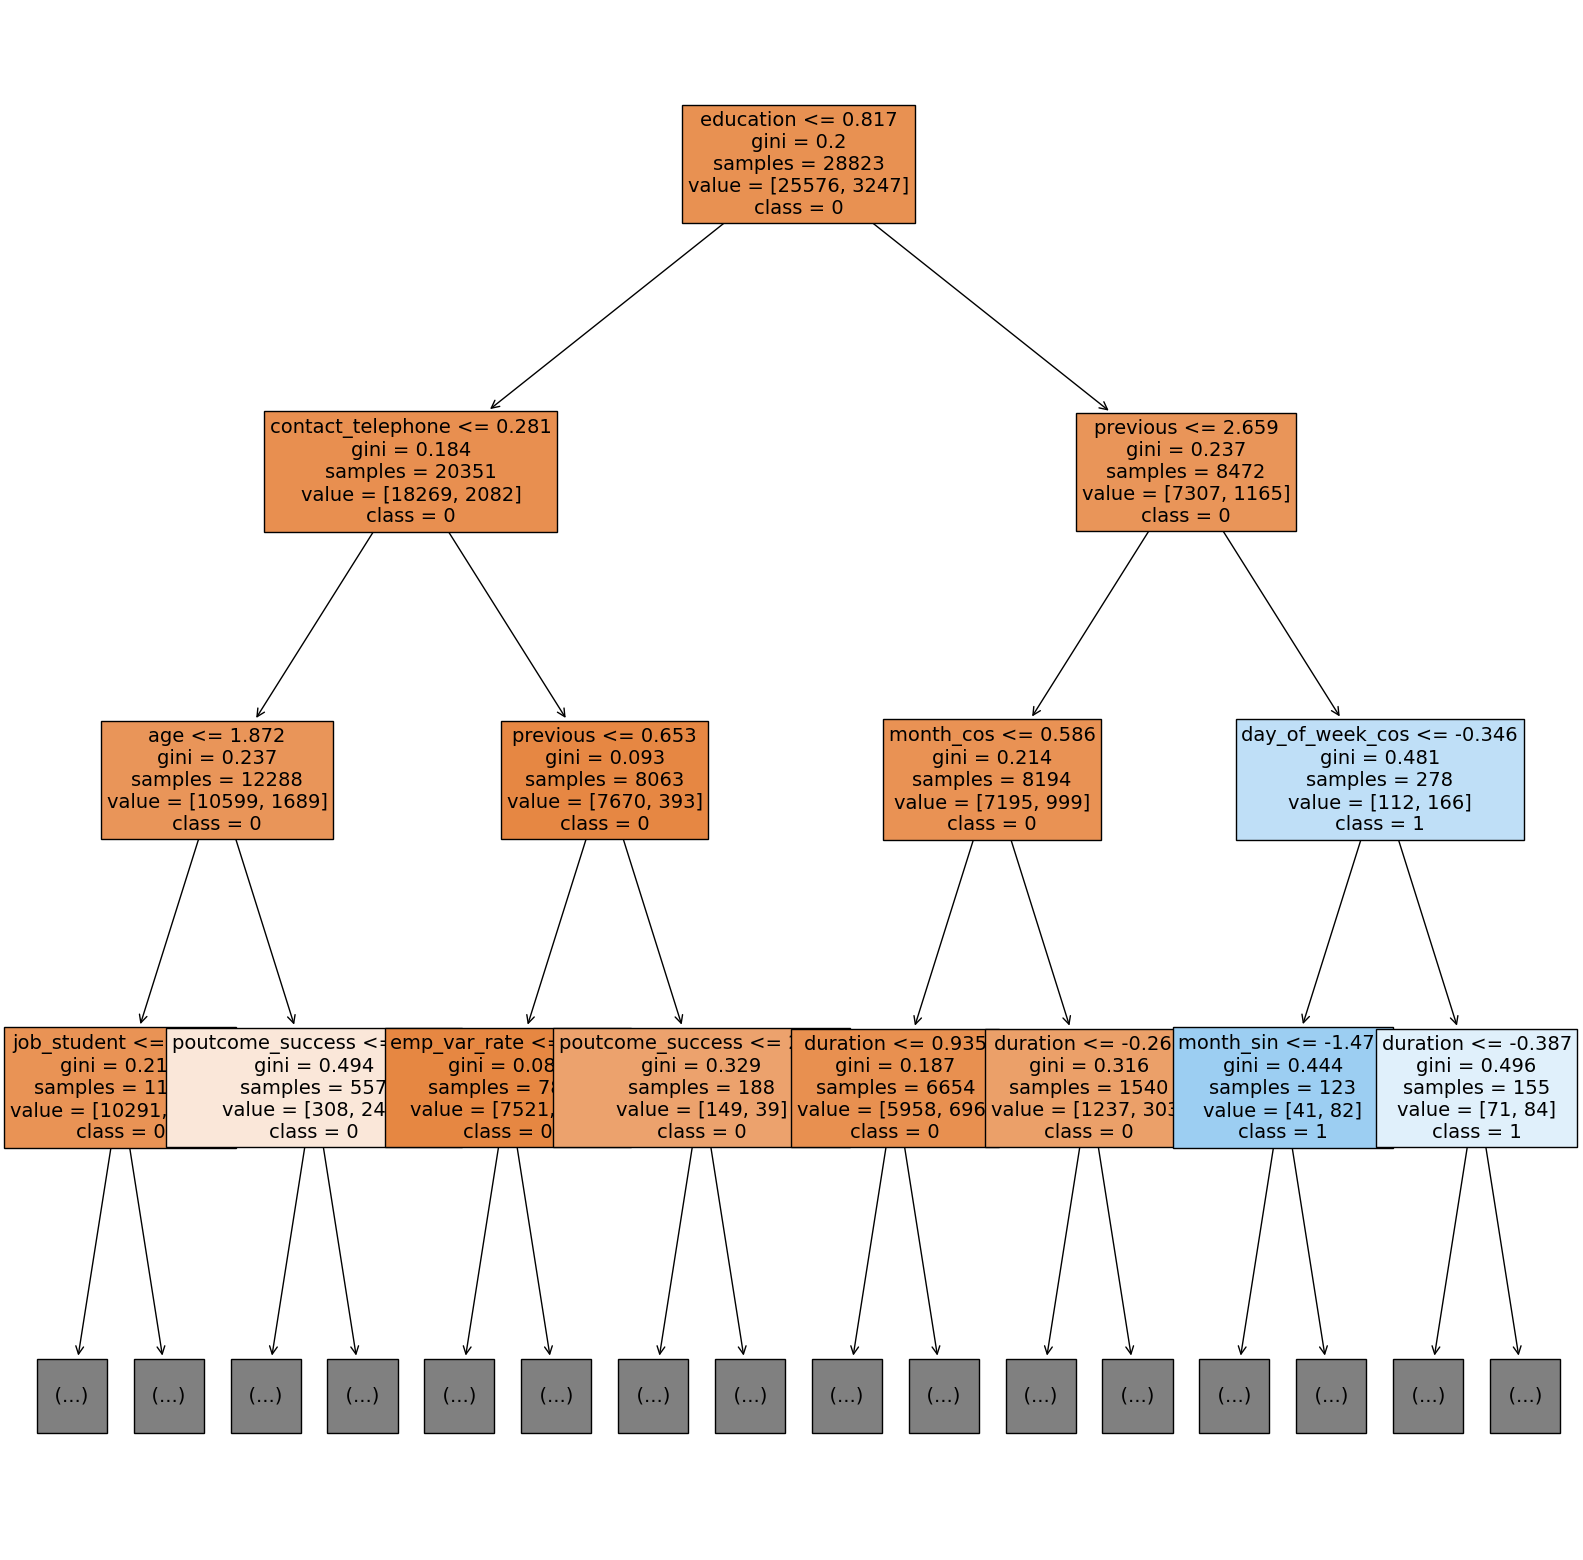

In [908]:
plt.figure(figsize=(20,20))
tree.plot_tree(
    models_dict["Decision Tree"], feature_names = X.columns.tolist(),
    class_names=["0","1"],
    filled = True, max_depth = 3, fontsize = 14
)
plt.show()

## Feature Importance

In [909]:
from sklearn.inspection import permutation_importance

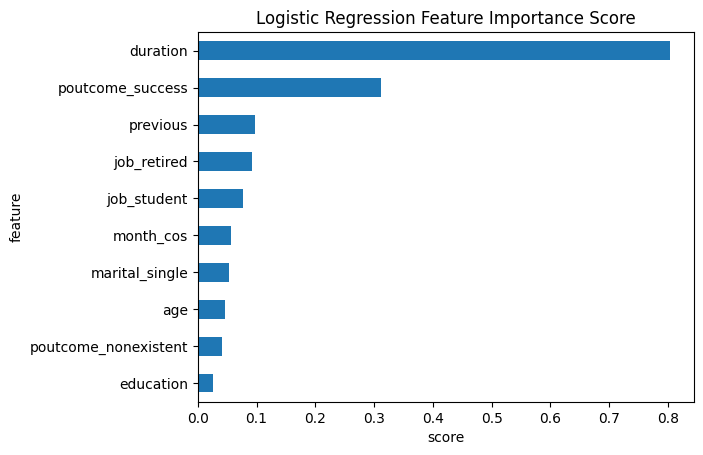

In [910]:
feat_importances = pd.Series(models_dict["Logistic Regression"].coef_[0], index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('Logistic Regression Feature Importance Score')
plt.show()

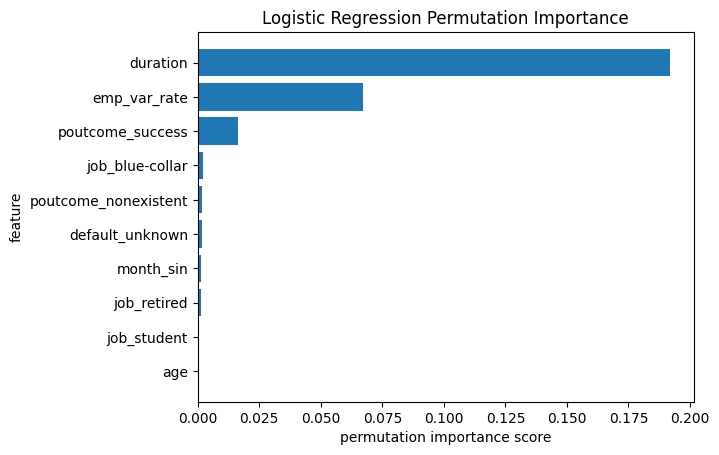

In [911]:
perm_importance = permutation_importance(models_dict["Logistic Regression"], X_train_trf, y_train, scoring = "roc_auc")

feature_names = X.columns.tolist()
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()[-10:]

plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('permutation importance score')
plt.ylabel('feature')
plt.title('Logistic Regression Permutation Importance')
plt.show()

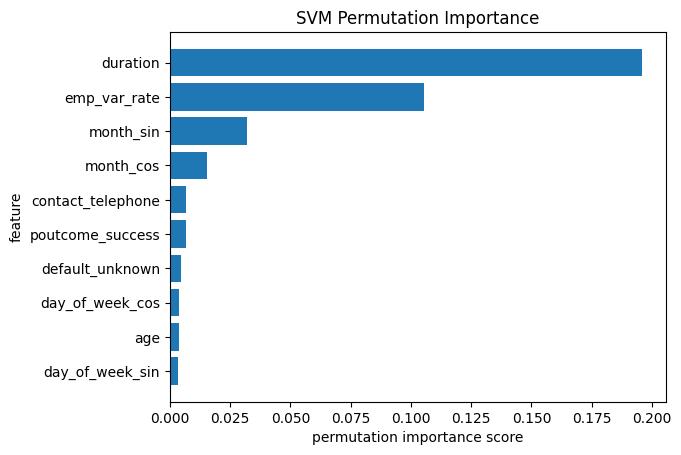

In [912]:
perm_importance = permutation_importance(models_dict["SVM"], X_train_trf, y_train, scoring = "roc_auc")

feature_names = X.columns.tolist()
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()[-10:]

plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('permutation importance score')
plt.ylabel('feature')
plt.title('SVM Permutation Importance')
plt.show()

In [913]:
# for tree based model
def feature_importance(model, name):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh')
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title((name) + ' Feature Importance Score ')

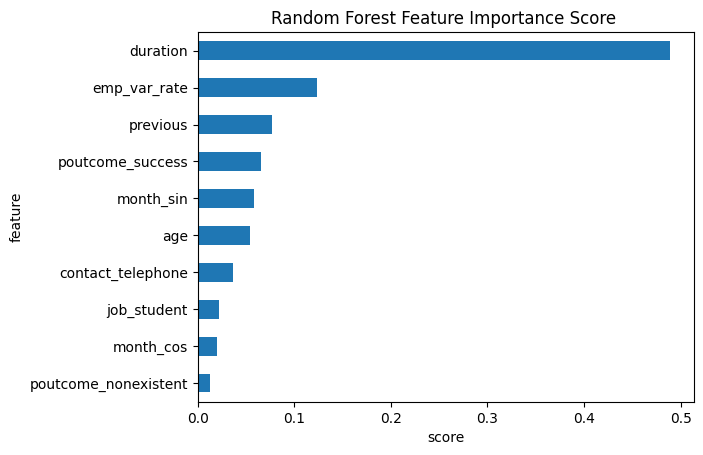

In [914]:
feature_importance(models_dict["Decision Tree"], 'Random Forest')
plt.show()

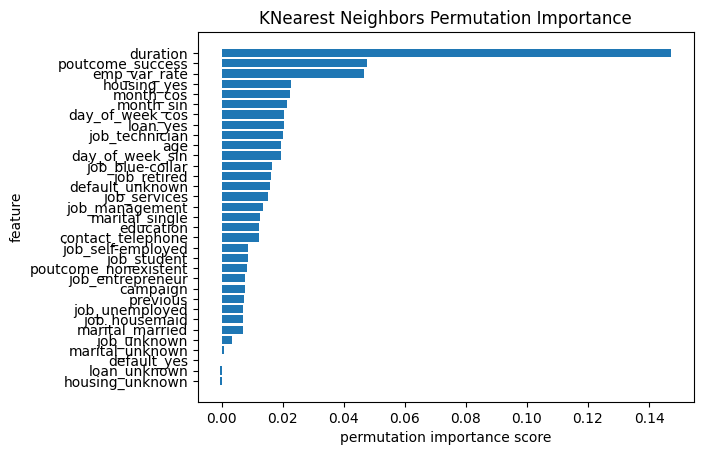

In [915]:
perm_importance = permutation_importance(models_dict["KNearest Neighbors"], X_train_trf, y_train, scoring = "roc_auc")

feature_names = X.columns.tolist()
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('permutation importance score')
plt.ylabel('feature')
plt.title('KNearest Neighbors Permutation Importance')
plt.show()

## Cross Validation Score

Since we have an imbalanced class in the target variable, the evaluation matrics that will be used is the one that can give the accuracy estimation even the proportion of the training set is imbalanced. Thus, we can use AUC that takes TPR and FPR into consideration. These metrics could show how well our model differentiates between 2 classes.

In [916]:
def display_score(scores):
    '''
    function to display cross validation mean and std.
    '''
    print(f"Scores: {scores}")
    print(f"Scores mean: {scores.mean()}")
    print(f"Scores Standar Deviation: {scores.std()}")

In [917]:
# create list to store cv scores
scores_cv = []

for model_name, model in models_dict.items():
    print(f"Cross Validation Scores of {model_name}")
    scores = cross_val_score(model, X_train_trf, y_train, scoring = 'roc_auc', cv = 5)
    scores_cv.append(scores)
    display_score(scores)
    print("\n")

Cross Validation Scores of Logistic Regression
Scores: [0.91953279 0.91709632 0.92072757 0.92316444 0.92480649]
Scores mean: 0.9210655240103502
Scores Standar Deviation: 0.002706228362353908


Cross Validation Scores of SVM
Scores: [0.90446269 0.90312084 0.90690518 0.90274834 0.89531921]
Scores mean: 0.9025112532333776
Scores Standar Deviation: 0.0038798952243885277


Cross Validation Scores of Decision Tree
Scores: [0.89565094 0.89461704 0.90468637 0.89466086 0.8939046 ]
Scores mean: 0.8967039620689661
Scores Standar Deviation: 0.004029729102846101


Cross Validation Scores of KNearest Neighbors
Scores: [0.80480932 0.81064336 0.81643612 0.82023415 0.80428827]
Scores mean: 0.8112822444162969
Scores Standar Deviation: 0.0062916090101811555




# Model Evaluation

In [918]:
def plot_roc_curve(fpr, tpr, label=None):
    '''
    ROC Curve plot with diagonal line
    '''
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)  

In [921]:
import time
# create list to store prediciton results
train_prediction_results = []
val_prediction_results = []

train_val_time_elapsed = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model Validation on {model_name}")
    # predict x val
    model_pred_val = model.predict(X_val_trf)
    
    # append result to list
    val_prediction_results.append(model_pred_val)
    
    model_pred_train = model.predict(X_train_trf)
    train_prediction_results.append(model_pred_train)
    
    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    train_val_time_elapsed.append(time_elapsed)
    print(f"elapsed time: {time_elapsed} ms")

Model Validation on Logistic Regression
elapsed time: 3.36 ms
Model Validation on SVM
elapsed time: 13711.13 ms
Model Validation on Decision Tree
elapsed time: 15.62 ms
Model Validation on KNearest Neighbors
elapsed time: 16552.13 ms


In [922]:
# create list to store prediciton results
y_scores_train = []
y_scores_val = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model Validation on {model_name}")
    # predict x val
    scores_val = model.predict_proba(X_val_trf)
    
    # append result to list
    y_scores_val.append(scores_val)
    
    scores_train = model.predict_proba(X_train_trf)
    y_scores_train.append(scores_train)
    
    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    print(f"elapsed time: {time_elapsed} ms")

Model Validation on Logistic Regression
elapsed time: 3.01 ms
Model Validation on SVM
elapsed time: 13955.12 ms
Model Validation on Decision Tree
elapsed time: 15.63 ms
Model Validation on KNearest Neighbors
elapsed time: 14405.82 ms


## Evaluation

In [923]:
# create list to append evaluation metrics val
f1_val = []
roc_auc_val = []
precision_val = []
recall_val = []
confusion_m_val = []
c_report_val = []

# calculate error val
for y_pred in val_prediction_results:
    roc_auc_val.append(roc_auc_score(y_val, y_pred))
    f1_val.append(f1_score(y_val, y_pred))
    precision_val.append(precision_score(y_val, y_pred))
    recall_val.append(recall_score(y_val, y_pred))
    confusion_m_val.append(confusion_matrix(y_val, y_pred))
    c_report_val.append(classification_report(y_val, y_pred))
    
# create list to append evaluation metrics train
f1_train = []
roc_auc_train = []
precision_train = []
recall_train = []
confusion_m_train = []
c_report_train = []

# calculate error train
for y_pred in train_prediction_results:
    roc_auc_train.append(roc_auc_score(y_train, y_pred))
    f1_train.append(f1_score(y_train, y_pred))
    precision_train.append(precision_score(y_train, y_pred))
    recall_train.append(recall_score(y_train, y_pred))
    confusion_m_train.append(confusion_matrix(y_train, y_pred))
    c_report_train.append(classification_report(y_train, y_pred))

In [924]:
# create list to append fpr, tpr, and threshold val
fpr_val = []
tpr_val = []
threshold_val = []

# calculate curve val
for y_score in y_scores_val:
    fpr_val.append(roc_curve(y_val, y_score[:, 1])[0])
    tpr_val.append(roc_curve(y_val, y_score[:, 1])[1])
    threshold_val.append(roc_curve(y_val, y_score[:, 1])[0])

# create list to append fpr, tpr, and threshold tain
fpr_train = []
tpr_train = []
threshold_train = []

# calculate curve train
for y_score in y_scores_train:
    fpr_train.append(roc_curve(y_train, y_score[:, 1])[0])
    tpr_train.append(roc_curve(y_train, y_score[:, 1])[1])
    threshold_train.append(roc_curve(y_train, y_score[:, 1])[0])

In [925]:
# save models name to list for later
models_name = list(models_dict.keys())

In [1032]:
# # create dataframe for model performances
# eval_dict = {
#     'model':models_dict.keys(),
#     'ROC_AUC_val': roc_auc_val,
#     'ROC_AUC_train': roc_auc_train,
#     'F1_val': f1_val, 
#     'F1_train': f1_train, 
#     'Precision_val': precision_val,
#     'Precision_train': precision_train,
#     'Recall_val': recall_val,
#     'Recall_train': recall_train,
#     'Time_Elapsed': train_val_time_elapsed
# }
# df_results = pd.DataFrame(data=eval_dict)
# df_results = df_results.set_index("model")

In [1022]:
df_results.sort_values(['ROC_AUC_val', 'ROC_AUC_train', 'F1_val', 'F1_train'], ascending = False)

,ROC_AUC_val,ROC_AUC_train,F1_val,F1_train,Precision_val,Precision_train,Recall_val,Recall_train,Time_Elapsed
model,,,,,,,,,
SVM,0.729231,0.756700,0.516818,0.572007,0.512169,0.578401,0.521552,0.565753,13711.13
Decision Tree,0.694236,0.724275,0.488103,0.547764,0.562588,0.629600,0.431034,0.484755,15.62
KNearest Neighbors,0.639990,0.704613,0.401679,0.545813,0.572854,0.757659,0.309267,0.426548,16552.13
Logistic Regression,0.628035,0.628866,0.388633,0.391698,0.676471,0.691888,0.272629,0.273175,3.36


In [1029]:
df_results[df_results.index != 'KNearest Neighbors'].sort_values(['ROC_AUC_val', 'ROC_AUC_train', 'F1_val', 'F1_train'], ascending = False)

,ROC_AUC_val,ROC_AUC_train,F1_val,F1_train,Precision_val,Precision_train,Recall_val,Recall_train,Time_Elapsed
model,,,,,,,,,
SVM,0.729231,0.756700,0.516818,0.572007,0.512169,0.578401,0.521552,0.565753,13711.13
Decision Tree,0.694236,0.724275,0.488103,0.547764,0.562588,0.629600,0.431034,0.484755,15.62
Logistic Regression,0.628035,0.628866,0.388633,0.391698,0.676471,0.691888,0.272629,0.273175,3.36


In [928]:
df_results.sort_values(['ROC_AUC_val', 'ROC_AUC_train'], ascending=False)[['ROC_AUC_val', 'ROC_AUC_train']]

,ROC_AUC_val,ROC_AUC_train
model,,
SVM,0.729231,0.756700
Decision Tree,0.694236,0.724275
KNearest Neighbors,0.639990,0.704613
Logistic Regression,0.628035,0.628866


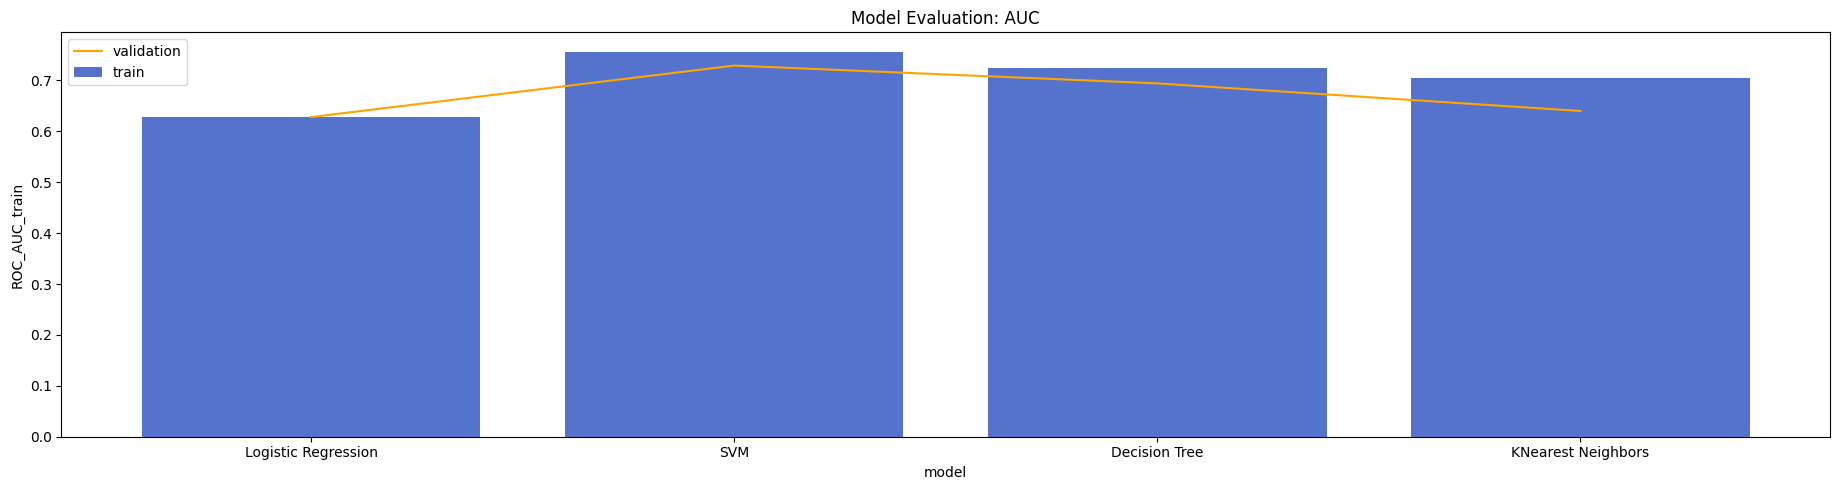

In [930]:
plt.figure(figsize = (18.5, 5))
sns.barplot(
    x = df_results.index, y = df_results["ROC_AUC_train"],
    label = "train", color = "royalblue",
)
sns.lineplot(
    x = df_results.index, y = df_results["ROC_AUC_val"],
    label = "validation", color = "orange"
)
plt.title("Model Evaluation: AUC")
plt.tight_layout()
# plt.savefig('fig/model/auc.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

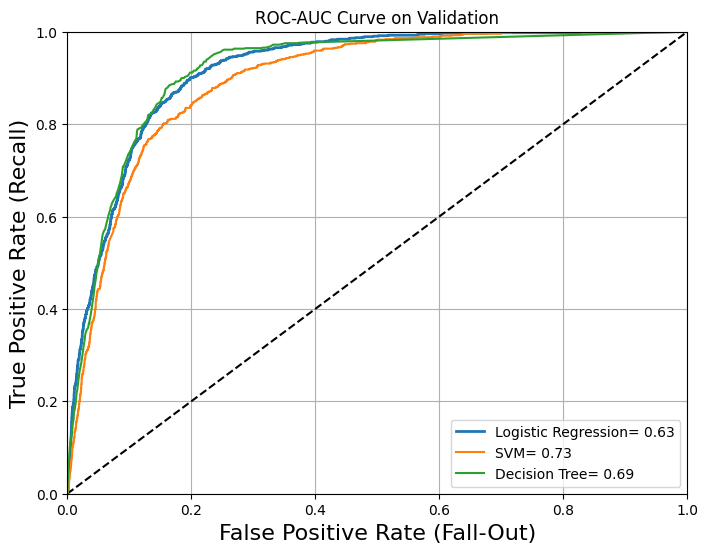

In [1030]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_val[0], tpr_val[0], label=models_name[0] + "= " + str(round(roc_auc_val[0],2)))
plt.plot(fpr_val[1], tpr_val[1], label=models_name[1] + "= " + str(round(roc_auc_val[1],2)))
plt.plot(fpr_val[2], tpr_val[2], label=models_name[2] + "= " + str(round(roc_auc_val[2],2)))
# plt.plot(fpr_val[3], tpr_val[3], label=models_name[3] + "= " + str(round(roc_auc_val[3],2)))
plt.title("ROC-AUC Curve on Validation")
plt.legend()
plt.show()


In [1031]:
df_results[df_results.index != 'KNearest Neighbors'].sort_values(['F1_val', 'F1_train'], ascending=False)[['F1_val', 'F1_train']]

,F1_val,F1_train
model,,
SVM,0.516818,0.572007
Decision Tree,0.488103,0.547764
Logistic Regression,0.388633,0.391698


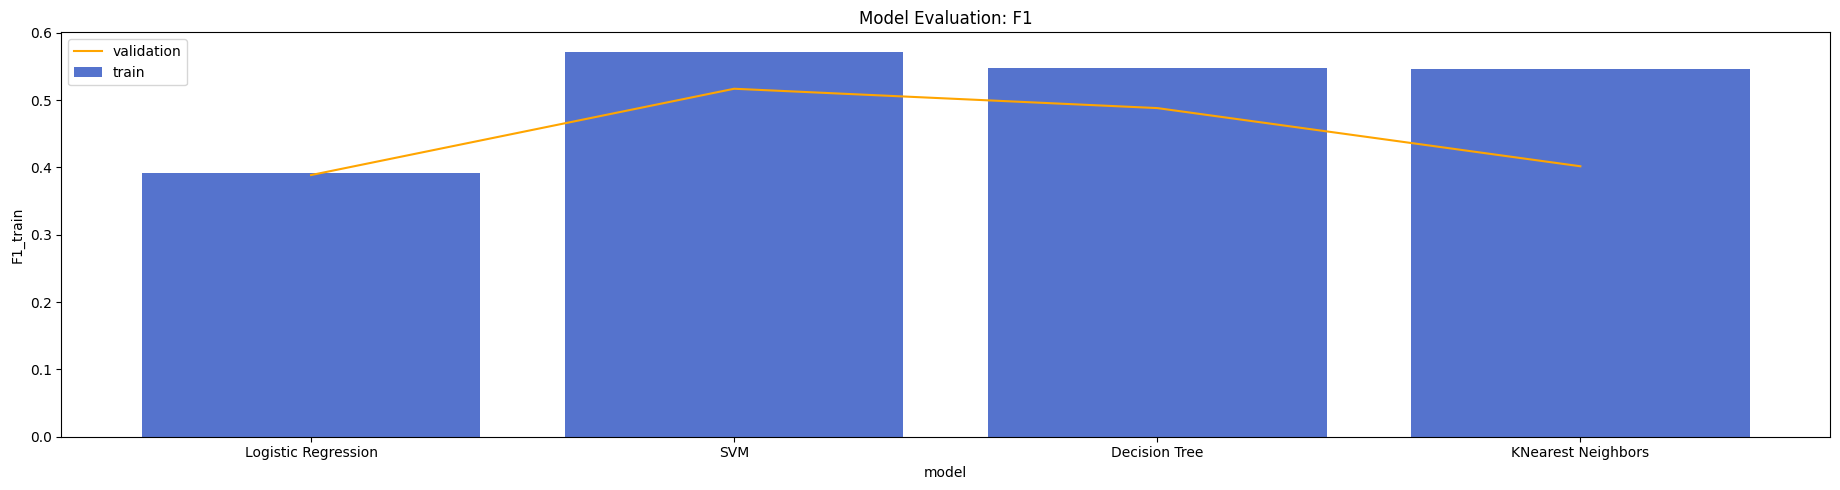

In [936]:
plt.figure(figsize = (18.5, 5))
sns.barplot(
    x = df_results.index, y = df_results["F1_train"],
    label = "train", color = "royalblue",
)
sns.lineplot(
    x = df_results.index, y = df_results["F1_val"],
    label = "validation", color = "orange"
)
plt.title("Model Evaluation: F1")
plt.tight_layout()
# plt.savefig('fig/model/f1.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()


In [937]:
df_results.sort_values(['Precision_val', 'Precision_train'], ascending=False)[['Precision_val', 'Precision_train']]

,Precision_val,Precision_train
model,,
Logistic Regression,0.676471,0.691888
KNearest Neighbors,0.572854,0.757659
Decision Tree,0.562588,0.629600
SVM,0.512169,0.578401


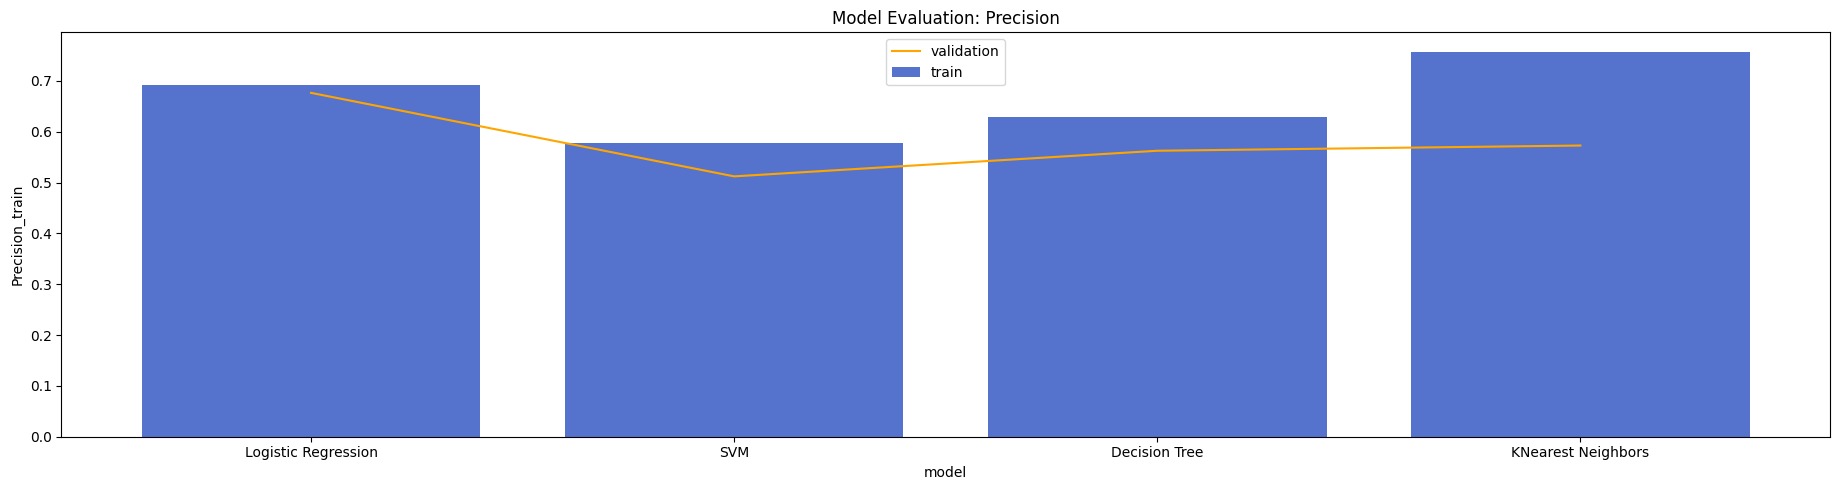

In [939]:
plt.figure(figsize = (18.5, 5))
sns.barplot(
    x = df_results.index, y = df_results["Precision_train"],
    label = "train", color = "royalblue",
)
sns.lineplot(
    x = df_results.index, y = df_results["Precision_val"],
    label = "validation", color = "orange"
)
plt.title("Model Evaluation: Precision")
plt.tight_layout()
# plt.savefig('fig/model/precision.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

In [940]:
df_results.sort_values(['Recall_val', 'Recall_train'], ascending=False)[['Recall_val', 'Recall_train']]

,Recall_val,Recall_train
model,,
SVM,0.521552,0.565753
Decision Tree,0.431034,0.484755
KNearest Neighbors,0.309267,0.426548
Logistic Regression,0.272629,0.273175


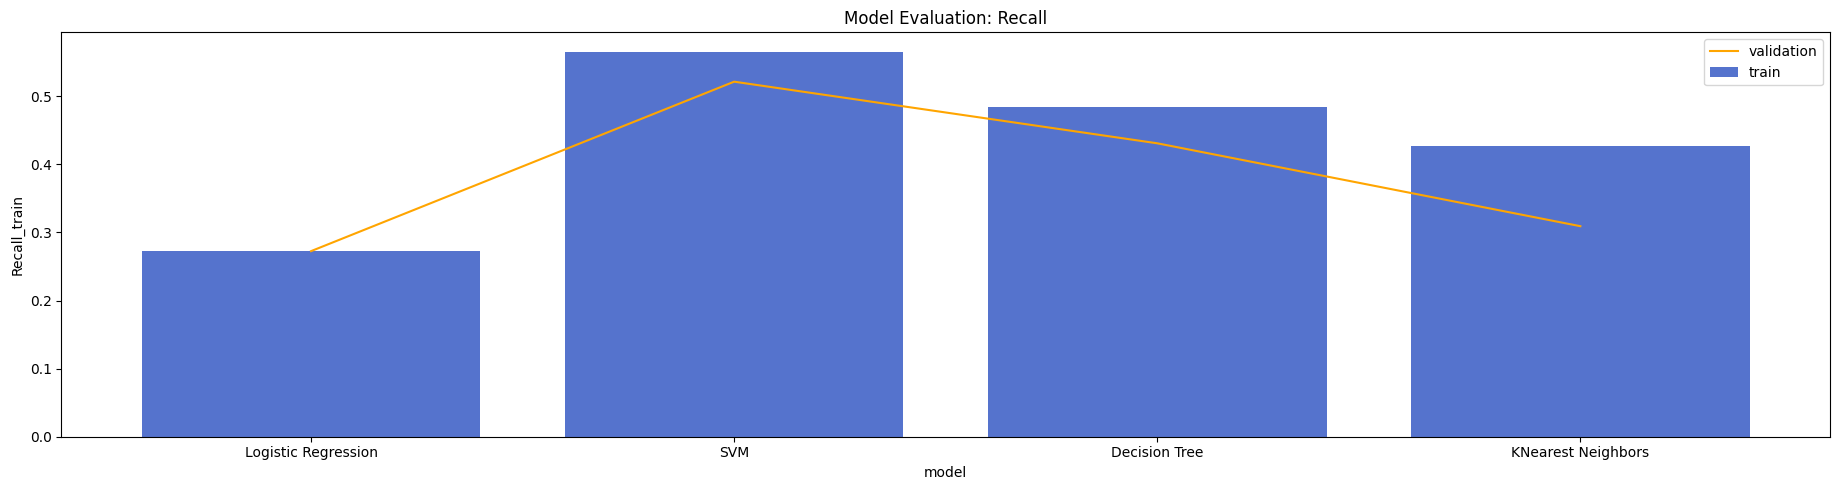

In [942]:
plt.figure(figsize = (18.5, 5))
sns.barplot(
    x = df_results.index, y = df_results["Recall_train"],
    label = "train", color = "royalblue",
)
sns.lineplot(
    x = df_results.index, y = df_results["Recall_val"],
    label = "validation", color = "orange"
)
plt.title("Model Evaluation: Recall")
plt.tight_layout()
# plt.savefig('fig/model/recall.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

In [943]:
df_results.sort_values(['Time_Elapsed'], ascending=False)[['Time_Elapsed']]

,Time_Elapsed
model,
KNearest Neighbors,16552.13
SVM,13711.13
Decision Tree,15.62
Logistic Regression,3.36


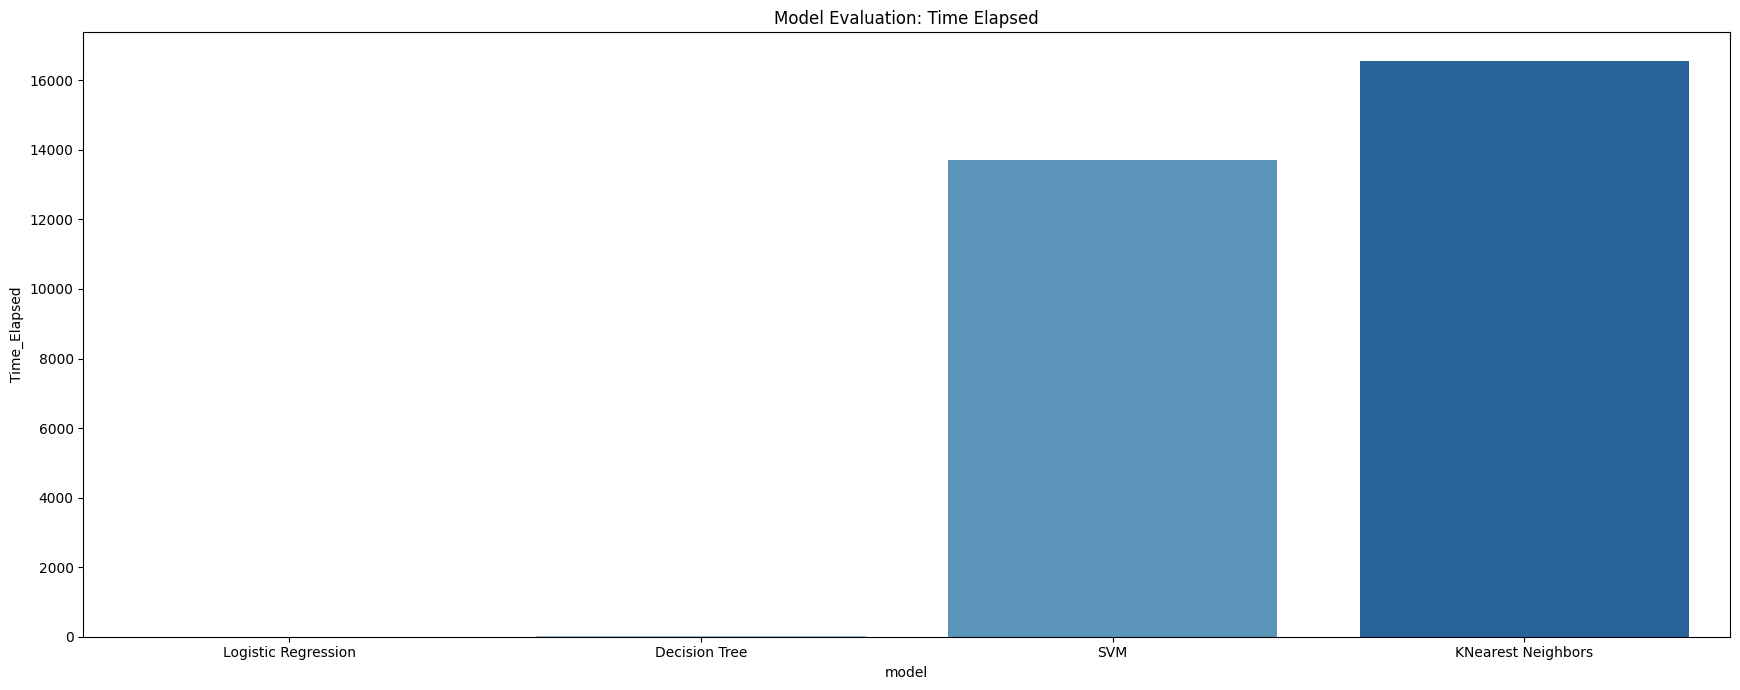

In [945]:
plt.figure(figsize = (17.5, 7))
sns.barplot(
    x = df_results.index, y = df_results["Time_Elapsed"],
    order = df_results["Time_Elapsed"].sort_values(ascending = True).index,
    palette = "Blues"
)
plt.title("Model Evaluation: Time Elapsed")
plt.tight_layout()
# plt.savefig('fig/model/time elapsed.png', bbox_inches = 'tight', dpi = 300, transparent = True)
plt.show()

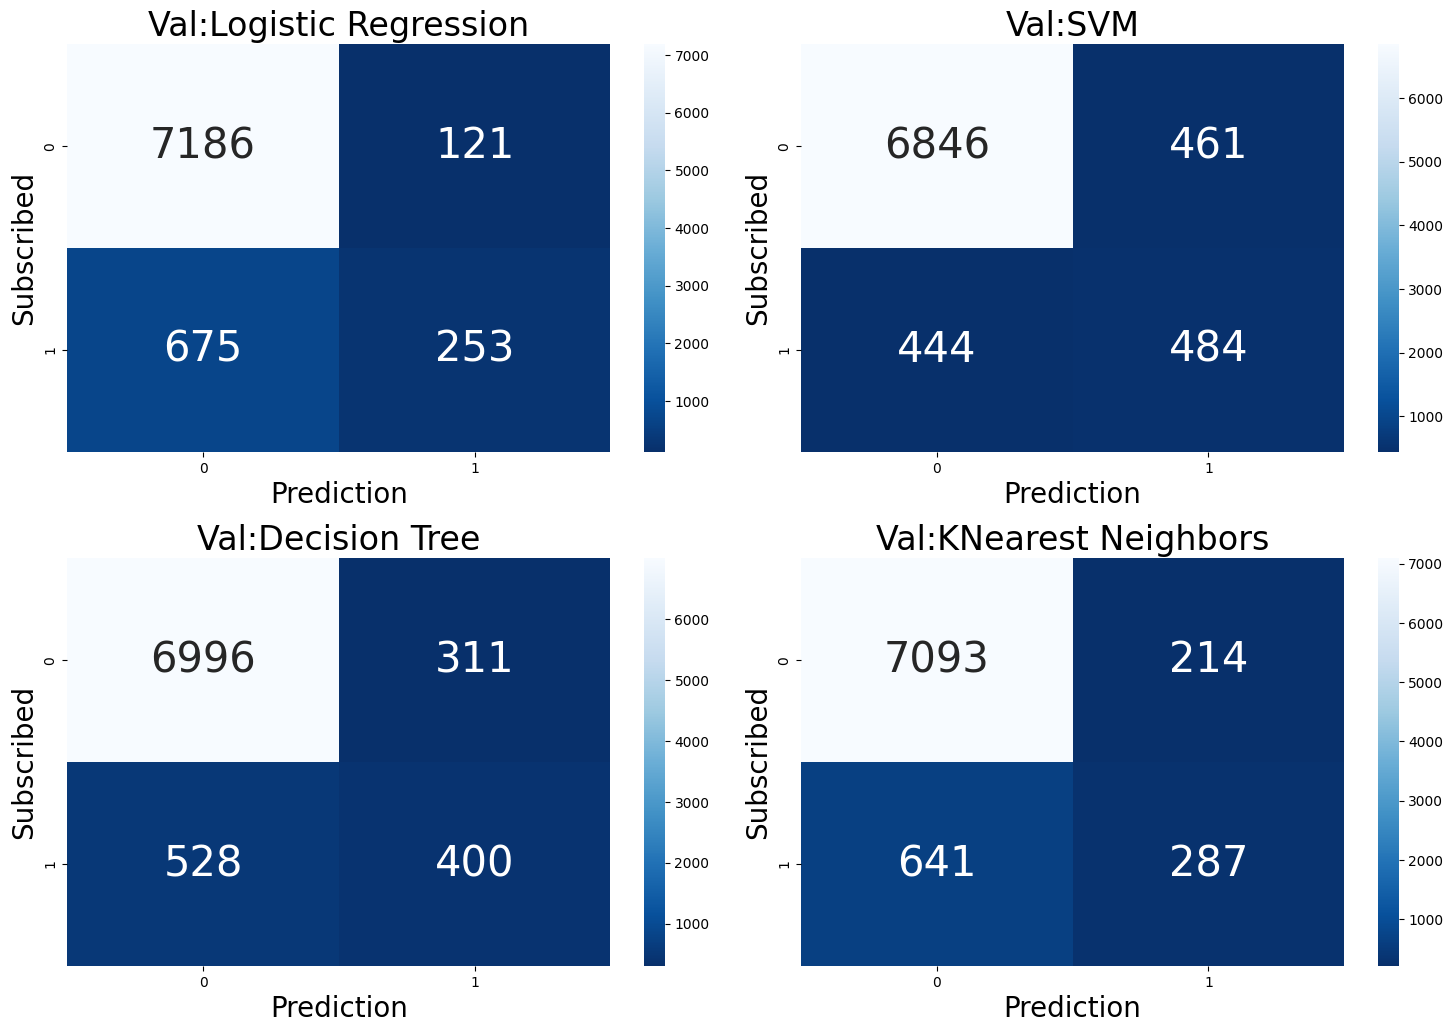

In [1011]:
# plot all numerical features
plt.figure(figsize = (15, 15))
for i in range(len(models_name)):
    plt.subplot(len(models_name)//2+1, 2, i + 1)
    sns.heatmap(
        confusion_m_val[i],
        annot = True,
        fmt = '.0f',
        cmap = 'Blues_r',
        annot_kws={"fontsize":30}
    )
    plt.xlabel("Prediction", fontsize = 20)
    plt.ylabel("Subscribed", fontsize = 20)
    plt.title("Val:" + str(models_name[i]), fontsize = 24)
plt.tight_layout()
plt.show()

In [947]:
for i in range(len(models_name)):
    print(models_name[i])
    print(c_report_val[i])

Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7307
           1       0.68      0.27      0.39       928

    accuracy                           0.90      8235
   macro avg       0.80      0.63      0.67      8235
weighted avg       0.89      0.90      0.88      8235

SVM
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7307
           1       0.51      0.52      0.52       928

    accuracy                           0.89      8235
   macro avg       0.73      0.73      0.73      8235
weighted avg       0.89      0.89      0.89      8235

Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7307
           1       0.56      0.43      0.49       928

    accuracy                           0.90      8235
   macro avg       0.75      0.69      0.72      8235
weighted avg       0.89      0.90   

In [950]:
best_model = models_dict["SVM"]

In [951]:
# predict y_test
svm_pred = best_model.predict(X_test_trf)

In [1006]:
prediction_svm = pd.DataFrame({
    "Actual": y_test,
    "Prediction": svm_pred
})
prediction_svm.head()

,Actual,Prediction
26635,0,0
24504,0,0
37882,0,1
37512,0,0
17776,0,0


In [1009]:
prediction_svm.groupby(["Actual"]).count().rename(columns={"Prediction":"Count"}).T

Actual,0,1
Count,3654,464


In [954]:
prediction_svm.groupby(["Prediction"]).count().rename(columns={"fact":"Count"}).T

Prediction,0,1
Fact,3665,453


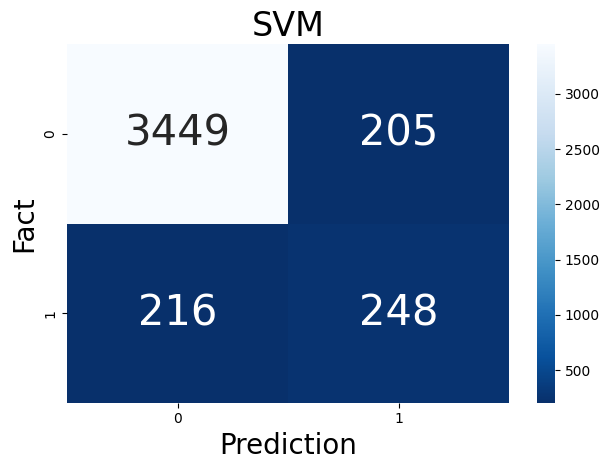

In [955]:
sns.heatmap(
    confusion_matrix(y_test, svm_pred),
    annot = True,
    fmt = '.0f',
    cmap = 'Blues_r',
    annot_kws={"fontsize":30}
)
plt.xlabel("Prediction", fontsize = 20)
plt.ylabel("Fact", fontsize = 20)
plt.title(str(models_name[1]), fontsize = 24)
plt.tight_layout()
plt.show()

In [956]:
scores_test_svm = best_model.predict_proba(X_test_trf)

In [957]:
fpr, tpr, threshold = roc_curve(y_test, scores_test_svm[:, 1])

In [958]:
roc_auc_test = roc_auc_score(y_test, svm_pred)

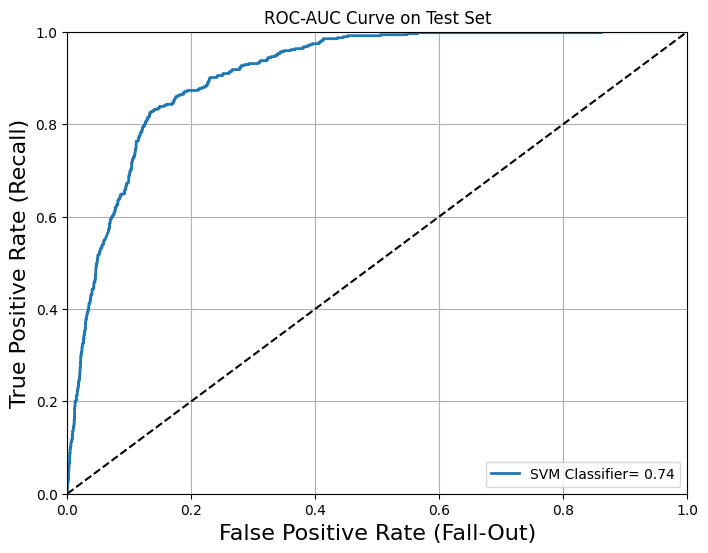

In [959]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr, label="SVM Classifier= " + str(round(roc_auc_test,2)))
plt.title("ROC-AUC Curve on Test Set")
plt.legend()
plt.show()

In [960]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3654
           1       0.55      0.53      0.54       464

    accuracy                           0.90      4118
   macro avg       0.74      0.74      0.74      4118
weighted avg       0.90      0.90      0.90      4118



In [962]:
predict_this = [[20, 6, 400, 20, 0, -1.1, 0, 0, 0, 0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.5,-0.866025,0.0,1.0]]
predict_val = scaling_pipeline.transform(predict_this)
if best_model.predict(predict_val) == 1:
    print("This person will more likely subscribe to the term deposit.")
else:
    print("This person will not likely to subscribe to the term deposit.")

This person will not likely to subscribe to the term deposit.


c:\users\madhu\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
